<a href="https://colab.research.google.com/github/UlyanaAt/neural-networks/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from pandas import (
    DataFrame,
    read_csv,
)
from sys import exc_info

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import (
    ModelCheckpoint,
    EarlyStopping,
)
import matplotlib.pyplot as plt

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

In [70]:
df: DataFrame = read_csv('/content/DS_2019_public.csv', encoding='ISO-8859-1', dtype=str)
df.head()

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
0,5,10,26,16.793,17,181.998,620.979,621,368,38606,...,-2,30110,2,120.893,121,4,0,1,1,1310.22
1,1,1,1,48.901,49,184.459,629.389,629,582,40248,...,2,7933,-2,242.746,243,2,0,1,-2,915.664
2,1,3,7,101.048,101,1063.022,3627.013,3627,425,40196,...,-2,6440,5,158.797,159,7,0,1,5,1670.534
3,1,1,1,0,0,0,0,0,616,36136,...,2,13884,5,85.138,85,5,0,1,5,346.468
4,1,4,10,45.132,45,274.53,936.677,937,685,74100,...,3,14204,6,151.319,151,6,0,1,5,920.454


In [71]:
df.describe()

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
count,10875,10875,10875,10875,10875,10875,10875,10875,10875,10875,...,10875,10875,10875,10875,10875,10875,10875,10875,10875,10875
unique,5,10,27,8854,1140,8922,8935,6413,1816,9638,...,27,8923,9,10630,599,21,2,2,4,10829
top,1,5,26,0,0,0,0,0,0,0,...,0,0,5,0,82,6,0,1,5,0
freq,3593,2029,1442,1938,1941,1938,1938,1938,500,500,...,3695,58,5245,19,93,1952,10866,5457,6964,18


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10875 entries, 0 to 10874
Columns: 121 entries, Climate_Region_Pub to KWHRFG
dtypes: object(121)
memory usage: 10.0+ MB


In [73]:
#drop bad rows
heads: list = list(df.columns)
errs: int = 1

while errs != 0:
    errs = 0
    for head in heads:
        try:
            df[head] = df[head].astype(float)
        except ValueError:
            errs += 1
            err = exc_info()[1].args[0].split('\'')[1]
            df = df.loc[df[head] != err]

print('DONE')

<ipython-input-73-0f749810a8fe>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[head] = df[head].astype(float)


DONE


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10785 entries, 0 to 10874
Columns: 121 entries, Climate_Region_Pub to KWHRFG
dtypes: float64(121)
memory usage: 10.0 MB


In [75]:
X = df.drop(['TOTALBTUSPH'], axis=1)
y = df['TOTALBTUSPH']

In [76]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [77]:
X1, X_, y1, y_ = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
)
X2, X3, y2, y3 = train_test_split(
    X_,
    y_,
    test_size=0.5,
    random_state=0,
)

print(f'Train : {X1.shape}, Test : {X2.shape}, Val: {X3.shape}')

Train : (8628, 120), Test : (1078, 120), Val: (1079, 120)


In [78]:
regressor = Sequential()
regressor.add(
    Dense(
        64,
        activation='relu',
        input_dim=X1.shape[1]
    )
)
regressor.add(
    Dense(
        32,
        activation='relu',
    )
)

regressor.add(
    Dense(
        1,
        activation='linear'
    )
)

regressor.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                7744      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 9857 (38.50 KB)
Trainable params: 9857 (38.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
regressor.compile(
    loss='mse',
    optimizer='adam',
    metrics='mae',
)

In [80]:
early_stop = EarlyStopping(
    monitor='val_mse',
    patience=10,
    mode='min',
    verbose=1,
)
checkpoint = ModelCheckpoint(
    '/content/checkFile.hdf5',
    monitor='val_loss',
    verbose=1,
    mode='min',
    save_best_only=True,
)
callbacks_list = [early_stop, checkpoint]

In [81]:
regressor_history = regressor.fit(
    X1,
    y1,
    batch_size=300,
    validation_data=(X3, y3),
    callbacks=callbacks_list,
    epochs=350,
)

Epoch 1/350
18/29 [=================>............] - ETA: 0s - loss: 2594699008.0000 - mae: 36422.8125 


Epoch 1: val_loss improved from inf to 2458357504.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 1s 9ms/step - loss: 2633272064.0000 - mae: 36828.2188 - val_loss: 2458357504.0000 - val_mae: 36279.7461
Epoch 2/350
21/29 [====================>.........] - ETA: 0s - loss: 2632814080.0000 - mae: 37016.9414

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 2458357504.00000 to 2457059840.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 2632530688.0000 - mae: 36819.3633 - val_loss: 2457059840.0000 - val_mae: 36263.9766
Epoch 3/350
23/29 [======================>.......] - ETA: 0s - loss: 2609347328.0000 - mae: 36685.8867


Epoch 3: val_loss improved from 2457059840.00000 to 2453618944.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 2630305024.0000 - mae: 36792.9414 - val_loss: 2453618944.0000 - val_mae: 36222.0859
Epoch 4/350
22/29 [=====================>........] - ETA: 0s - loss: 2639598080.0000 - mae: 37003.0859


Epoch 4: val_loss improved from 2453618944.00000 to 2446464512.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 2625202688.0000 - mae: 36732.0117 - val_loss: 2446464512.0000 - val_mae: 36134.8125
Epoch 5/350
24/29 [=======================>......] - ETA: 0s - loss: 2595289856.0000 - mae: 36520.7227


Epoch 5: val_loss improved from 2446464512.00000 to 2434015232.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 2615537920.0000 - mae: 36617.4492 - val_loss: 2434015232.0000 - val_mae: 35982.4609
Epoch 6/350
23/29 [======================>.......] - ETA: 0s - loss: 2619812352.0000 - mae: 36734.3242


Epoch 6: val_loss improved from 2434015232.00000 to 2414640896.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 2599841792.0000 - mae: 36429.4883 - val_loss: 2414640896.0000 - val_mae: 35744.0820
Epoch 7/350
24/29 [=======================>......] - ETA: 0s - loss: 2559781632.0000 - mae: 35910.2383


Epoch 7: val_loss improved from 2414640896.00000 to 2386709760.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 2576211456.0000 - mae: 36144.9922 - val_loss: 2386709760.0000 - val_mae: 35397.5859
Epoch 8/350
20/29 [===================>..........] - ETA: 0s - loss: 2510122240.0000 - mae: 35274.9375


Epoch 8: val_loss improved from 2386709760.00000 to 2348771840.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 2543181056.0000 - mae: 35747.4570 - val_loss: 2348771840.0000 - val_mae: 34923.9766
Epoch 9/350
20/29 [===================>..........] - ETA: 0s - loss: 2509660160.0000 - mae: 35423.9531


Epoch 9: val_loss improved from 2348771840.00000 to 2299554304.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 2499731200.0000 - mae: 35218.2500 - val_loss: 2299554304.0000 - val_mae: 34308.3281
Epoch 10/350
23/29 [======================>.......] - ETA: 0s - loss: 2439698176.0000 - mae: 34496.3164


Epoch 10: val_loss improved from 2299554304.00000 to 2239004416.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 2444574464.0000 - mae: 34555.0703 - val_loss: 2239004416.0000 - val_mae: 33560.0977
Epoch 11/350
23/29 [======================>.......] - ETA: 0s - loss: 2410432768.0000 - mae: 33928.0430


Epoch 11: val_loss improved from 2239004416.00000 to 2166498560.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 2377665792.0000 - mae: 33771.1289 - val_loss: 2166498560.0000 - val_mae: 32687.9336
Epoch 12/350
22/29 [=====================>........] - ETA: 0s - loss: 2343314688.0000 - mae: 33233.0391


Epoch 12: val_loss improved from 2166498560.00000 to 2082826624.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 2298828800.0000 - mae: 32888.4492 - val_loss: 2082826624.0000 - val_mae: 31721.1602
Epoch 13/350
24/29 [=======================>......] - ETA: 0s - loss: 2231036416.0000 - mae: 32128.2441


Epoch 13: val_loss improved from 2082826624.00000 to 1989156352.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 2209294592.0000 - mae: 31926.2266 - val_loss: 1989156352.0000 - val_mae: 30697.8027
Epoch 14/350
21/29 [====================>.........] - ETA: 0s - loss: 2137328256.0000 - mae: 31133.6973


Epoch 14: val_loss improved from 1989156352.00000 to 1887807744.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 2110423296.0000 - mae: 30925.9453 - val_loss: 1887807744.0000 - val_mae: 29666.3867
Epoch 15/350
23/29 [======================>.......] - ETA: 0s - loss: 2025133312.0000 - mae: 30102.1992


Epoch 15: val_loss improved from 1887807744.00000 to 1780645760.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 2004822656.0000 - mae: 29932.7852 - val_loss: 1780645760.0000 - val_mae: 28631.0020
Epoch 16/350
24/29 [=======================>......] - ETA: 0s - loss: 1876665984.0000 - mae: 28906.1016


Epoch 16: val_loss improved from 1780645760.00000 to 1671899776.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 1894055552.0000 - mae: 28974.3516 - val_loss: 1671899776.0000 - val_mae: 27688.7148
Epoch 17/350
24/29 [=======================>......] - ETA: 0s - loss: 1781141888.0000 - mae: 27956.5273


Epoch 17: val_loss improved from 1671899776.00000 to 1562766976.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 1782543232.0000 - mae: 28104.9023 - val_loss: 1562766976.0000 - val_mae: 26872.5840
Epoch 18/350
25/29 [========================>.....] - ETA: 0s - loss: 1694657408.0000 - mae: 27426.9980


Epoch 18: val_loss improved from 1562766976.00000 to 1457346944.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 1673019392.0000 - mae: 27344.5684 - val_loss: 1457346944.0000 - val_mae: 26219.2969
Epoch 19/350
24/29 [=======================>......] - ETA: 0s - loss: 1588055296.0000 - mae: 26884.3535


Epoch 19: val_loss improved from 1457346944.00000 to 1359100160.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 1568403584.0000 - mae: 26725.5312 - val_loss: 1359100160.0000 - val_mae: 25676.2188
Epoch 20/350
24/29 [=======================>......] - ETA: 0s - loss: 1486944384.0000 - mae: 26300.2090


Epoch 20: val_loss improved from 1359100160.00000 to 1270724480.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 1471607168.0000 - mae: 26191.1172 - val_loss: 1270724480.0000 - val_mae: 25236.8965
Epoch 21/350
24/29 [=======================>......] - ETA: 0s - loss: 1378613248.0000 - mae: 25646.9824


Epoch 21: val_loss improved from 1270724480.00000 to 1193433600.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 1384822784.0000 - mae: 25788.5566 - val_loss: 1193433600.0000 - val_mae: 24867.7461
Epoch 22/350
25/29 [========================>.....] - ETA: 0s - loss: 1332345216.0000 - mae: 25595.1406


Epoch 22: val_loss improved from 1193433600.00000 to 1127260672.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 1309722496.0000 - mae: 25465.4121 - val_loss: 1127260672.0000 - val_mae: 24563.2402
Epoch 23/350
24/29 [=======================>......] - ETA: 0s - loss: 1246506240.0000 - mae: 25244.7070


Epoch 23: val_loss improved from 1127260672.00000 to 1073228480.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 1245690752.0000 - mae: 25223.6680 - val_loss: 1073228480.0000 - val_mae: 24321.5801
Epoch 24/350
22/29 [=====================>........] - ETA: 0s - loss: 1199539200.0000 - mae: 24972.1211


Epoch 24: val_loss improved from 1073228480.00000 to 1029616576.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 1192748672.0000 - mae: 25019.1074 - val_loss: 1029616576.0000 - val_mae: 24134.6816
Epoch 25/350
23/29 [======================>.......] - ETA: 0s - loss: 1154324608.0000 - mae: 24950.0820


Epoch 25: val_loss improved from 1029616576.00000 to 993901696.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 1149800832.0000 - mae: 24863.4551 - val_loss: 993901696.0000 - val_mae: 23975.3223
Epoch 26/350
22/29 [=====================>........] - ETA: 0s - loss: 1109503616.0000 - mae: 24662.6328


Epoch 26: val_loss improved from 993901696.00000 to 965182656.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 1114346496.0000 - mae: 24729.6113 - val_loss: 965182656.0000 - val_mae: 23828.1484
Epoch 27/350
23/29 [======================>.......] - ETA: 0s - loss: 1081101568.0000 - mae: 24552.4688


Epoch 27: val_loss improved from 965182656.00000 to 940752192.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 1085065728.0000 - mae: 24602.7930 - val_loss: 940752192.0000 - val_mae: 23681.1660
Epoch 28/350
21/29 [====================>.........] - ETA: 0s - loss: 1052860544.0000 - mae: 24466.7598


Epoch 28: val_loss improved from 940752192.00000 to 919816256.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 1059885248.0000 - mae: 24472.8633 - val_loss: 919816256.0000 - val_mae: 23527.8242
Epoch 29/350
20/29 [===================>..........] - ETA: 0s - loss: 1036911296.0000 - mae: 24313.6719


Epoch 29: val_loss improved from 919816256.00000 to 901300864.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 1037529600.0000 - mae: 24307.8340 - val_loss: 901300864.0000 - val_mae: 23347.6113
Epoch 30/350
22/29 [=====================>........] - ETA: 0s - loss: 1042034816.0000 - mae: 24347.1484


Epoch 30: val_loss improved from 901300864.00000 to 883861056.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 1017398464.0000 - mae: 24133.8789 - val_loss: 883861056.0000 - val_mae: 23158.5840
Epoch 31/350
24/29 [=======================>......] - ETA: 0s - loss: 996260480.0000 - mae: 23949.3320 


Epoch 31: val_loss improved from 883861056.00000 to 867476480.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 998133184.0000 - mae: 23928.7559 - val_loss: 867476480.0000 - val_mae: 22940.2422
Epoch 32/350
22/29 [=====================>........] - ETA: 0s - loss: 964951744.0000 - mae: 23651.1738 


Epoch 32: val_loss improved from 867476480.00000 to 851718528.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 979794944.0000 - mae: 23725.1152 - val_loss: 851718528.0000 - val_mae: 22725.3633
Epoch 33/350
24/29 [=======================>......] - ETA: 0s - loss: 957123264.0000 - mae: 23531.9551


Epoch 33: val_loss improved from 851718528.00000 to 836006400.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 962201536.0000 - mae: 23517.7441 - val_loss: 836006400.0000 - val_mae: 22510.5078
Epoch 34/350
21/29 [====================>.........] - ETA: 0s - loss: 950112640.0000 - mae: 23272.2598 


Epoch 34: val_loss improved from 836006400.00000 to 820625600.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 944758784.0000 - mae: 23282.2930 - val_loss: 820625600.0000 - val_mae: 22280.8770
Epoch 35/350
22/29 [=====================>........] - ETA: 0s - loss: 937735296.0000 - mae: 23065.9219


Epoch 35: val_loss improved from 820625600.00000 to 805472896.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 927637760.0000 - mae: 23042.0176 - val_loss: 805472896.0000 - val_mae: 22045.4492
Epoch 36/350
22/29 [=====================>........] - ETA: 0s - loss: 895597760.0000 - mae: 22698.4023


Epoch 36: val_loss improved from 805472896.00000 to 790369792.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 910705216.0000 - mae: 22806.7285 - val_loss: 790369792.0000 - val_mae: 21801.3984
Epoch 37/350
21/29 [====================>.........] - ETA: 0s - loss: 893320512.0000 - mae: 22439.2285


Epoch 37: val_loss improved from 790369792.00000 to 775435904.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 893893952.0000 - mae: 22537.6152 - val_loss: 775435904.0000 - val_mae: 21551.1230
Epoch 38/350
20/29 [===================>..........] - ETA: 0s - loss: 870164480.0000 - mae: 22277.6914


Epoch 38: val_loss improved from 775435904.00000 to 760636864.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 877127296.0000 - mae: 22282.9922 - val_loss: 760636864.0000 - val_mae: 21289.1855
Epoch 39/350
21/29 [====================>.........] - ETA: 0s - loss: 875300416.0000 - mae: 22189.6074


Epoch 39: val_loss improved from 760636864.00000 to 745878144.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 860662656.0000 - mae: 22026.0859 - val_loss: 745878144.0000 - val_mae: 21046.8848
Epoch 40/350
25/29 [========================>.....] - ETA: 0s - loss: 853069952.0000 - mae: 21787.8438


Epoch 40: val_loss improved from 745878144.00000 to 731130304.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 844030464.0000 - mae: 21756.2578 - val_loss: 731130304.0000 - val_mae: 20772.6777
Epoch 41/350
24/29 [=======================>......] - ETA: 0s - loss: 827480576.0000 - mae: 21448.7383


Epoch 41: val_loss improved from 731130304.00000 to 716618432.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 827555520.0000 - mae: 21476.9023 - val_loss: 716618432.0000 - val_mae: 20498.5918
Epoch 42/350
23/29 [======================>.......] - ETA: 0s - loss: 790296128.0000 - mae: 21067.6133


Epoch 42: val_loss improved from 716618432.00000 to 702184768.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 811179904.0000 - mae: 21195.6191 - val_loss: 702184768.0000 - val_mae: 20219.1953
Epoch 43/350
22/29 [=====================>........] - ETA: 0s - loss: 792714624.0000 - mae: 20956.0098


Epoch 43: val_loss improved from 702184768.00000 to 687804608.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 795170944.0000 - mae: 20947.6602 - val_loss: 687804608.0000 - val_mae: 19945.5234
Epoch 44/350
23/29 [======================>.......] - ETA: 0s - loss: 773838976.0000 - mae: 20620.0957


Epoch 44: val_loss improved from 687804608.00000 to 673492864.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 778763136.0000 - mae: 20633.4023 - val_loss: 673492864.0000 - val_mae: 19643.7207
Epoch 45/350
24/29 [=======================>......] - ETA: 0s - loss: 745718336.0000 - mae: 20249.9004


Epoch 45: val_loss improved from 673492864.00000 to 659530432.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 762636544.0000 - mae: 20357.4023 - val_loss: 659530432.0000 - val_mae: 19373.4473
Epoch 46/350
23/29 [======================>.......] - ETA: 0s - loss: 754180288.0000 - mae: 20122.2441


Epoch 46: val_loss improved from 659530432.00000 to 645380160.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 746615808.0000 - mae: 20052.5547 - val_loss: 645380160.0000 - val_mae: 19065.3945
Epoch 47/350
21/29 [====================>.........] - ETA: 0s - loss: 749623680.0000 - mae: 19937.8418


Epoch 47: val_loss improved from 645380160.00000 to 631620480.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 730683328.0000 - mae: 19765.2812 - val_loss: 631620480.0000 - val_mae: 18788.5156
Epoch 48/350
22/29 [=====================>........] - ETA: 0s - loss: 712675072.0000 - mae: 19489.7812


Epoch 48: val_loss improved from 631620480.00000 to 618088896.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 714832448.0000 - mae: 19475.1348 - val_loss: 618088896.0000 - val_mae: 18494.2930
Epoch 49/350
24/29 [=======================>......] - ETA: 0s - loss: 694678336.0000 - mae: 19177.4473


Epoch 49: val_loss improved from 618088896.00000 to 604679936.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 699345536.0000 - mae: 19166.7969 - val_loss: 604679936.0000 - val_mae: 18203.1523
Epoch 50/350
24/29 [=======================>......] - ETA: 0s - loss: 681060032.0000 - mae: 18909.2090


Epoch 50: val_loss improved from 604679936.00000 to 591679936.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 683929664.0000 - mae: 18905.7148 - val_loss: 591679936.0000 - val_mae: 17936.5215
Epoch 51/350
20/29 [===================>..........] - ETA: 0s - loss: 684122240.0000 - mae: 18764.1934


Epoch 51: val_loss improved from 591679936.00000 to 578673920.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 668779264.0000 - mae: 18582.8984 - val_loss: 578673920.0000 - val_mae: 17627.9473
Epoch 52/350
23/29 [======================>.......] - ETA: 0s - loss: 643012992.0000 - mae: 18260.8340


Epoch 52: val_loss improved from 578673920.00000 to 566330560.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 653942656.0000 - mae: 18308.7617 - val_loss: 566330560.0000 - val_mae: 17360.4062
Epoch 53/350
23/29 [======================>.......] - ETA: 0s - loss: 641009728.0000 - mae: 18126.0137


Epoch 53: val_loss improved from 566330560.00000 to 554345664.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 639471680.0000 - mae: 18026.2207 - val_loss: 554345664.0000 - val_mae: 17108.2480
Epoch 54/350
23/29 [======================>.......] - ETA: 0s - loss: 635624320.0000 - mae: 17811.6211 


Epoch 54: val_loss improved from 554345664.00000 to 542349184.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 625273408.0000 - mae: 17725.0684 - val_loss: 542349184.0000 - val_mae: 16818.9766
Epoch 55/350
22/29 [=====================>........] - ETA: 0s - loss: 614743680.0000 - mae: 17464.8965


Epoch 55: val_loss improved from 542349184.00000 to 531248832.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 611378688.0000 - mae: 17444.4668 - val_loss: 531248832.0000 - val_mae: 16596.9199
Epoch 56/350
22/29 [=====================>........] - ETA: 0s - loss: 594572480.0000 - mae: 17254.5000


Epoch 56: val_loss improved from 531248832.00000 to 520308768.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 597820800.0000 - mae: 17183.6426 - val_loss: 520308768.0000 - val_mae: 16340.8711
Epoch 57/350
23/29 [======================>.......] - ETA: 0s - loss: 583641792.0000 - mae: 16953.0801


Epoch 57: val_loss improved from 520308768.00000 to 509817408.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 584807168.0000 - mae: 16934.6074 - val_loss: 509817408.0000 - val_mae: 16115.3701
Epoch 58/350
22/29 [=====================>........] - ETA: 0s - loss: 575568512.0000 - mae: 16836.8418


Epoch 58: val_loss improved from 509817408.00000 to 499633408.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 572002752.0000 - mae: 16671.6621 - val_loss: 499633408.0000 - val_mae: 15879.1719
Epoch 59/350
23/29 [======================>.......] - ETA: 0s - loss: 557940288.0000 - mae: 16562.9355


Epoch 59: val_loss improved from 499633408.00000 to 489939968.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 559755200.0000 - mae: 16439.0938 - val_loss: 489939968.0000 - val_mae: 15674.5762
Epoch 60/350
24/29 [=======================>......] - ETA: 0s - loss: 556415360.0000 - mae: 16251.8301


Epoch 60: val_loss improved from 489939968.00000 to 480803616.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 547851072.0000 - mae: 16222.7188 - val_loss: 480803616.0000 - val_mae: 15489.3184
Epoch 61/350
23/29 [======================>.......] - ETA: 0s - loss: 548115968.0000 - mae: 15996.5488


Epoch 61: val_loss improved from 480803616.00000 to 472014336.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 536473696.0000 - mae: 15954.9521 - val_loss: 472014336.0000 - val_mae: 15302.2754
Epoch 62/350
22/29 [=====================>........] - ETA: 0s - loss: 520469664.0000 - mae: 15765.4863


Epoch 62: val_loss improved from 472014336.00000 to 463722784.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 525265792.0000 - mae: 15777.9531 - val_loss: 463722784.0000 - val_mae: 15142.1406
Epoch 63/350
23/29 [======================>.......] - ETA: 0s - loss: 521524128.0000 - mae: 15591.2549


Epoch 63: val_loss improved from 463722784.00000 to 455479488.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 514772416.0000 - mae: 15595.2451 - val_loss: 455479488.0000 - val_mae: 14955.5801
Epoch 64/350
21/29 [====================>.........] - ETA: 0s - loss: 492128096.0000 - mae: 15259.6670


Epoch 64: val_loss improved from 455479488.00000 to 448072288.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 504356544.0000 - mae: 15387.6328 - val_loss: 448072288.0000 - val_mae: 14814.5088
Epoch 65/350
16/29 [===============>..............] - ETA: 0s - loss: 506882080.0000 - mae: 15370.1367


Epoch 65: val_loss improved from 448072288.00000 to 440850272.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 494615616.0000 - mae: 15236.4775 - val_loss: 440850272.0000 - val_mae: 14680.5547
Epoch 66/350
17/29 [================>.............] - ETA: 0s - loss: 486972000.0000 - mae: 15019.9297


Epoch 66: val_loss improved from 440850272.00000 to 433854080.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 485152928.0000 - mae: 15047.4961 - val_loss: 433854080.0000 - val_mae: 14539.3438
Epoch 67/350
17/29 [================>.............] - ETA: 0s - loss: 469692000.0000 - mae: 14833.8184


Epoch 67: val_loss improved from 433854080.00000 to 427242304.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 476050208.0000 - mae: 14890.6572 - val_loss: 427242304.0000 - val_mae: 14411.4365
Epoch 68/350
17/29 [================>.............] - ETA: 0s - loss: 479115616.0000 - mae: 14798.9678


Epoch 68: val_loss improved from 427242304.00000 to 421145024.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 467337408.0000 - mae: 14743.6934 - val_loss: 421145024.0000 - val_mae: 14310.6543
Epoch 69/350
29/29 [==============================] - ETA: 0s - loss: 458869312.0000 - mae: 14603.4092


Epoch 69: val_loss improved from 421145024.00000 to 414712960.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 458869312.0000 - mae: 14603.4092 - val_loss: 414712960.0000 - val_mae: 14164.7910
Epoch 70/350
17/29 [================>.............] - ETA: 0s - loss: 446233280.0000 - mae: 14482.7842


Epoch 70: val_loss improved from 414712960.00000 to 409042656.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 450805728.0000 - mae: 14436.7549 - val_loss: 409042656.0000 - val_mae: 14064.2451
Epoch 71/350
16/29 [===============>..............] - ETA: 0s - loss: 422393760.0000 - mae: 14133.2412


Epoch 71: val_loss improved from 409042656.00000 to 403563360.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 442987136.0000 - mae: 14314.8350 - val_loss: 403563360.0000 - val_mae: 13971.6680
Epoch 72/350
17/29 [================>.............] - ETA: 0s - loss: 414548544.0000 - mae: 13996.6953


Epoch 72: val_loss improved from 403563360.00000 to 398372640.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 435521312.0000 - mae: 14200.5039 - val_loss: 398372640.0000 - val_mae: 13895.9473
Epoch 73/350
15/29 [==============>...............] - ETA: 0s - loss: 430623744.0000 - mae: 14012.8984


Epoch 73: val_loss improved from 398372640.00000 to 393173024.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 428194688.0000 - mae: 14100.4502 - val_loss: 393173024.0000 - val_mae: 13808.1230
Epoch 74/350
16/29 [===============>..............] - ETA: 0s - loss: 456704832.0000 - mae: 14222.2363


Epoch 74: val_loss improved from 393173024.00000 to 387955008.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 421176160.0000 - mae: 13962.1387 - val_loss: 387955008.0000 - val_mae: 13711.7109
Epoch 75/350
17/29 [================>.............] - ETA: 0s - loss: 414443456.0000 - mae: 13862.9932


Epoch 75: val_loss improved from 387955008.00000 to 383038912.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 414326560.0000 - mae: 13829.5684 - val_loss: 383038912.0000 - val_mae: 13624.2744
Epoch 76/350
17/29 [================>.............] - ETA: 0s - loss: 411620576.0000 - mae: 13627.7031


Epoch 76: val_loss improved from 383038912.00000 to 378409184.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 407815552.0000 - mae: 13709.7422 - val_loss: 378409184.0000 - val_mae: 13547.9424
Epoch 77/350
17/29 [================>.............] - ETA: 0s - loss: 413338240.0000 - mae: 13741.2783


Epoch 77: val_loss improved from 378409184.00000 to 373859936.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 401469824.0000 - mae: 13625.5781 - val_loss: 373859936.0000 - val_mae: 13473.8818
Epoch 78/350
16/29 [===============>..............] - ETA: 0s - loss: 407906240.0000 - mae: 13632.6465


Epoch 78: val_loss improved from 373859936.00000 to 369574528.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 395185536.0000 - mae: 13497.8994 - val_loss: 369574528.0000 - val_mae: 13406.2646
Epoch 79/350
17/29 [================>.............] - ETA: 0s - loss: 383680192.0000 - mae: 13306.4033


Epoch 79: val_loss improved from 369574528.00000 to 365265600.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 389175168.0000 - mae: 13408.6670 - val_loss: 365265600.0000 - val_mae: 13333.3809
Epoch 80/350
18/29 [=================>............] - ETA: 0s - loss: 387651168.0000 - mae: 13278.2871


Epoch 80: val_loss improved from 365265600.00000 to 360920480.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 383400224.0000 - mae: 13280.0430 - val_loss: 360920480.0000 - val_mae: 13255.1123
Epoch 81/350
17/29 [================>.............] - ETA: 0s - loss: 372360256.0000 - mae: 13152.9736


Epoch 81: val_loss improved from 360920480.00000 to 357052000.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 377758592.0000 - mae: 13169.1279 - val_loss: 357052000.0000 - val_mae: 13197.9570
Epoch 82/350
17/29 [================>.............] - ETA: 0s - loss: 360374624.0000 - mae: 13083.8145


Epoch 82: val_loss improved from 357052000.00000 to 352947296.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 372223424.0000 - mae: 13109.3076 - val_loss: 352947296.0000 - val_mae: 13127.0254
Epoch 83/350
21/29 [====================>.........] - ETA: 0s - loss: 367517152.0000 - mae: 13147.0303


Epoch 83: val_loss improved from 352947296.00000 to 348898848.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 366864992.0000 - mae: 12997.7051 - val_loss: 348898848.0000 - val_mae: 13058.0752
Epoch 84/350
23/29 [======================>.......] - ETA: 0s - loss: 358419808.0000 - mae: 12903.3135


Epoch 84: val_loss improved from 348898848.00000 to 345003968.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 361543680.0000 - mae: 12888.0811 - val_loss: 345003968.0000 - val_mae: 12989.0566
Epoch 85/350
25/29 [========================>.....] - ETA: 0s - loss: 357506240.0000 - mae: 12802.7949


Epoch 85: val_loss improved from 345003968.00000 to 341311200.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 356451712.0000 - mae: 12804.2109 - val_loss: 341311200.0000 - val_mae: 12930.5146
Epoch 86/350
22/29 [=====================>........] - ETA: 0s - loss: 340241984.0000 - mae: 12562.0361


Epoch 86: val_loss improved from 341311200.00000 to 337263456.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 351496000.0000 - mae: 12695.1416 - val_loss: 337263456.0000 - val_mae: 12846.0400
Epoch 87/350
24/29 [=======================>......] - ETA: 0s - loss: 341848800.0000 - mae: 12611.7109


Epoch 87: val_loss improved from 337263456.00000 to 333731904.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 346591712.0000 - mae: 12620.7812 - val_loss: 333731904.0000 - val_mae: 12790.6094
Epoch 88/350
23/29 [======================>.......] - ETA: 0s - loss: 348431776.0000 - mae: 12557.9082


Epoch 88: val_loss improved from 333731904.00000 to 330172992.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 341787392.0000 - mae: 12545.2852 - val_loss: 330172992.0000 - val_mae: 12728.6455
Epoch 89/350
23/29 [======================>.......] - ETA: 0s - loss: 335276832.0000 - mae: 12381.6680


Epoch 89: val_loss improved from 330172992.00000 to 326196416.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 337058432.0000 - mae: 12408.2344 - val_loss: 326196416.0000 - val_mae: 12638.6855
Epoch 90/350
24/29 [=======================>......] - ETA: 0s - loss: 325250784.0000 - mae: 12255.8955


Epoch 90: val_loss improved from 326196416.00000 to 322663264.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 332360320.0000 - mae: 12341.8447 - val_loss: 322663264.0000 - val_mae: 12573.1660
Epoch 91/350
24/29 [=======================>......] - ETA: 0s - loss: 335373248.0000 - mae: 12359.7871


Epoch 91: val_loss improved from 322663264.00000 to 319130496.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 327929504.0000 - mae: 12279.1387 - val_loss: 319130496.0000 - val_mae: 12510.4521
Epoch 92/350
22/29 [=====================>........] - ETA: 0s - loss: 328724384.0000 - mae: 12160.7256


Epoch 92: val_loss improved from 319130496.00000 to 315374368.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 323322784.0000 - mae: 12167.0879 - val_loss: 315374368.0000 - val_mae: 12432.4395
Epoch 93/350
23/29 [======================>.......] - ETA: 0s - loss: 317490304.0000 - mae: 12104.8398


Epoch 93: val_loss improved from 315374368.00000 to 311821504.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 318899904.0000 - mae: 12068.9160 - val_loss: 311821504.0000 - val_mae: 12360.9678
Epoch 94/350
24/29 [=======================>......] - ETA: 0s - loss: 306764672.0000 - mae: 11978.1924


Epoch 94: val_loss improved from 311821504.00000 to 308547072.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 314596992.0000 - mae: 12005.1689 - val_loss: 308547072.0000 - val_mae: 12301.3340
Epoch 95/350
24/29 [=======================>......] - ETA: 0s - loss: 316047680.0000 - mae: 11962.0449


Epoch 95: val_loss improved from 308547072.00000 to 304983776.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 310320640.0000 - mae: 11910.6309 - val_loss: 304983776.0000 - val_mae: 12226.3877
Epoch 96/350
23/29 [======================>.......] - ETA: 0s - loss: 299411008.0000 - mae: 11682.6387


Epoch 96: val_loss improved from 304983776.00000 to 301551424.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 306122400.0000 - mae: 11810.6201 - val_loss: 301551424.0000 - val_mae: 12155.3232
Epoch 97/350
25/29 [========================>.....] - ETA: 0s - loss: 303281632.0000 - mae: 11737.9639


Epoch 97: val_loss improved from 301551424.00000 to 298123328.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 301972992.0000 - mae: 11751.8135 - val_loss: 298123328.0000 - val_mae: 12081.7344
Epoch 98/350
20/29 [===================>..........] - ETA: 0s - loss: 302674016.0000 - mae: 11709.4746


Epoch 98: val_loss improved from 298123328.00000 to 294778336.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 297944992.0000 - mae: 11647.7109 - val_loss: 294778336.0000 - val_mae: 12011.7578
Epoch 99/350
22/29 [=====================>........] - ETA: 0s - loss: 286565920.0000 - mae: 11554.1924


Epoch 99: val_loss improved from 294778336.00000 to 291136096.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 293884032.0000 - mae: 11567.9727 - val_loss: 291136096.0000 - val_mae: 11926.2959
Epoch 100/350
23/29 [======================>.......] - ETA: 0s - loss: 279363776.0000 - mae: 11398.4277


Epoch 100: val_loss improved from 291136096.00000 to 287641504.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 289883840.0000 - mae: 11502.4424 - val_loss: 287641504.0000 - val_mae: 11843.8086
Epoch 101/350
20/29 [===================>..........] - ETA: 0s - loss: 301026848.0000 - mae: 11567.2119


Epoch 101: val_loss improved from 287641504.00000 to 284407776.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 285983552.0000 - mae: 11414.0078 - val_loss: 284407776.0000 - val_mae: 11776.5977
Epoch 102/350
25/29 [========================>.....] - ETA: 0s - loss: 284134688.0000 - mae: 11350.5820


Epoch 102: val_loss improved from 284407776.00000 to 280863616.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 282006944.0000 - mae: 11318.8936 - val_loss: 280863616.0000 - val_mae: 11688.2764
Epoch 103/350
25/29 [========================>.....] - ETA: 0s - loss: 275898400.0000 - mae: 11268.4287


Epoch 103: val_loss improved from 280863616.00000 to 277850624.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 278225504.0000 - mae: 11251.3174 - val_loss: 277850624.0000 - val_mae: 11627.4473
Epoch 104/350
22/29 [=====================>........] - ETA: 0s - loss: 270309632.0000 - mae: 11075.4863


Epoch 104: val_loss improved from 277850624.00000 to 274426784.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 274453664.0000 - mae: 11138.7168 - val_loss: 274426784.0000 - val_mae: 11545.5029
Epoch 105/350
18/29 [=================>............] - ETA: 0s - loss: 273013632.0000 - mae: 11194.4004


Epoch 105: val_loss improved from 274426784.00000 to 271311264.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 270645632.0000 - mae: 11087.1113 - val_loss: 271311264.0000 - val_mae: 11478.5557
Epoch 106/350
23/29 [======================>.......] - ETA: 0s - loss: 267948160.0000 - mae: 10982.9365


Epoch 106: val_loss improved from 271311264.00000 to 267979248.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 266904192.0000 - mae: 11011.6904 - val_loss: 267979248.0000 - val_mae: 11398.6621
Epoch 107/350
23/29 [======================>.......] - ETA: 0s - loss: 248130592.0000 - mae: 10786.7627


Epoch 107: val_loss improved from 267979248.00000 to 264488928.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 263169488.0000 - mae: 10913.2510 - val_loss: 264488928.0000 - val_mae: 11307.5000
Epoch 108/350
21/29 [====================>.........] - ETA: 0s - loss: 268134096.0000 - mae: 10989.0957


Epoch 108: val_loss improved from 264488928.00000 to 261501728.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 259659792.0000 - mae: 10860.8545 - val_loss: 261501728.0000 - val_mae: 11245.4492
Epoch 109/350
24/29 [=======================>......] - ETA: 0s - loss: 249761008.0000 - mae: 10664.3838


Epoch 109: val_loss improved from 261501728.00000 to 257968704.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 255980480.0000 - mae: 10734.5889 - val_loss: 257968704.0000 - val_mae: 11151.6592
Epoch 110/350
22/29 [=====================>........] - ETA: 0s - loss: 253736016.0000 - mae: 10680.9580


Epoch 110: val_loss improved from 257968704.00000 to 254925952.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 252421728.0000 - mae: 10692.4180 - val_loss: 254925952.0000 - val_mae: 11084.8223
Epoch 111/350
24/29 [=======================>......] - ETA: 0s - loss: 247696384.0000 - mae: 10609.5381


Epoch 111: val_loss improved from 254925952.00000 to 251485600.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 248832496.0000 - mae: 10598.7617 - val_loss: 251485600.0000 - val_mae: 10993.5098
Epoch 112/350
20/29 [===================>..........] - ETA: 0s - loss: 244117632.0000 - mae: 10506.5850


Epoch 112: val_loss improved from 251485600.00000 to 248566512.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 245294512.0000 - mae: 10522.2559 - val_loss: 248566512.0000 - val_mae: 10931.8291
Epoch 113/350
21/29 [====================>.........] - ETA: 0s - loss: 239775520.0000 - mae: 10450.0498


Epoch 113: val_loss improved from 248566512.00000 to 245243600.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 241826992.0000 - mae: 10457.1396 - val_loss: 245243600.0000 - val_mae: 10847.1777
Epoch 114/350
24/29 [=======================>......] - ETA: 0s - loss: 242317920.0000 - mae: 10399.5166


Epoch 114: val_loss improved from 245243600.00000 to 241966928.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 238398064.0000 - mae: 10361.1191 - val_loss: 241966928.0000 - val_mae: 10767.3789
Epoch 115/350
24/29 [=======================>......] - ETA: 0s - loss: 234475680.0000 - mae: 10330.7178


Epoch 115: val_loss improved from 241966928.00000 to 238628656.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 234990416.0000 - mae: 10300.4951 - val_loss: 238628656.0000 - val_mae: 10682.3711
Epoch 116/350
23/29 [======================>.......] - ETA: 0s - loss: 223834976.0000 - mae: 10114.4902


Epoch 116: val_loss improved from 238628656.00000 to 235577600.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 231590704.0000 - mae: 10202.2119 - val_loss: 235577600.0000 - val_mae: 10608.7334
Epoch 117/350
24/29 [=======================>......] - ETA: 0s - loss: 226632816.0000 - mae: 10147.9326


Epoch 117: val_loss improved from 235577600.00000 to 232642064.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 228313104.0000 - mae: 10156.4229 - val_loss: 232642064.0000 - val_mae: 10541.1914
Epoch 118/350
23/29 [======================>.......] - ETA: 0s - loss: 227324032.0000 - mae: 10022.8711


Epoch 118: val_loss improved from 232642064.00000 to 229622864.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 225008560.0000 - mae: 10064.8428 - val_loss: 229622864.0000 - val_mae: 10468.4219
Epoch 119/350
23/29 [======================>.......] - ETA: 0s - loss: 228395392.0000 - mae: 10059.4492


Epoch 119: val_loss improved from 229622864.00000 to 226318304.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 221760096.0000 - mae: 9988.4395 - val_loss: 226318304.0000 - val_mae: 10378.6367
Epoch 120/350
19/29 [==================>...........] - ETA: 0s - loss: 219876368.0000 - mae: 9911.4102 


Epoch 120: val_loss improved from 226318304.00000 to 223477472.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 218481328.0000 - mae: 9931.0166 - val_loss: 223477472.0000 - val_mae: 10312.4004
Epoch 121/350
24/29 [=======================>......] - ETA: 0s - loss: 219935136.0000 - mae: 9857.2363


Epoch 121: val_loss improved from 223477472.00000 to 220707328.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 215376800.0000 - mae: 9836.8252 - val_loss: 220707328.0000 - val_mae: 10248.6572
Epoch 122/350
22/29 [=====================>........] - ETA: 0s - loss: 208319904.0000 - mae: 9701.5459


Epoch 122: val_loss improved from 220707328.00000 to 217102512.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 212100048.0000 - mae: 9761.8584 - val_loss: 217102512.0000 - val_mae: 10140.5742
Epoch 123/350
23/29 [======================>.......] - ETA: 0s - loss: 208569648.0000 - mae: 9782.0459 


Epoch 123: val_loss improved from 217102512.00000 to 214306048.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 208966640.0000 - mae: 9691.0361 - val_loss: 214306048.0000 - val_mae: 10071.6123
Epoch 124/350
22/29 [=====================>........] - ETA: 0s - loss: 207210912.0000 - mae: 9638.5078


Epoch 124: val_loss improved from 214306048.00000 to 211213872.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 205937408.0000 - mae: 9624.5303 - val_loss: 211213872.0000 - val_mae: 9987.0283
Epoch 125/350
23/29 [======================>.......] - ETA: 0s - loss: 195996368.0000 - mae: 9509.7383


Epoch 125: val_loss improved from 211213872.00000 to 208340832.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 202856976.0000 - mae: 9529.5996 - val_loss: 208340832.0000 - val_mae: 9913.7520
Epoch 126/350
22/29 [=====================>........] - ETA: 0s - loss: 200032672.0000 - mae: 9449.5332


Epoch 126: val_loss improved from 208340832.00000 to 205507344.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 199819792.0000 - mae: 9495.1914 - val_loss: 205507344.0000 - val_mae: 9843.1807
Epoch 127/350
22/29 [=====================>........] - ETA: 0s - loss: 190398432.0000 - mae: 9287.9922 


Epoch 127: val_loss improved from 205507344.00000 to 202744048.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 196805136.0000 - mae: 9389.5303 - val_loss: 202744048.0000 - val_mae: 9772.2627
Epoch 128/350
21/29 [====================>.........] - ETA: 0s - loss: 193320256.0000 - mae: 9296.1592


Epoch 128: val_loss improved from 202744048.00000 to 199633360.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 193806080.0000 - mae: 9342.2656 - val_loss: 199633360.0000 - val_mae: 9685.4863
Epoch 129/350
22/29 [=====================>........] - ETA: 0s - loss: 200146352.0000 - mae: 9395.1172 


Epoch 129: val_loss improved from 199633360.00000 to 196562592.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 190929776.0000 - mae: 9264.9629 - val_loss: 196562592.0000 - val_mae: 9600.9580
Epoch 130/350
24/29 [=======================>......] - ETA: 0s - loss: 194713168.0000 - mae: 9274.3555


Epoch 130: val_loss improved from 196562592.00000 to 194194224.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 187974320.0000 - mae: 9178.5303 - val_loss: 194194224.0000 - val_mae: 9548.1396
Epoch 131/350
23/29 [======================>.......] - ETA: 0s - loss: 189860016.0000 - mae: 9167.2666


Epoch 131: val_loss improved from 194194224.00000 to 191145648.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 185036496.0000 - mae: 9119.4541 - val_loss: 191145648.0000 - val_mae: 9460.7119
Epoch 132/350
23/29 [======================>.......] - ETA: 0s - loss: 184250192.0000 - mae: 9042.1182


Epoch 132: val_loss improved from 191145648.00000 to 188382192.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 182202784.0000 - mae: 9038.1807 - val_loss: 188382192.0000 - val_mae: 9385.8506
Epoch 133/350
19/29 [==================>...........] - ETA: 0s - loss: 181543712.0000 - mae: 9070.9600


Epoch 133: val_loss improved from 188382192.00000 to 185309536.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 179346976.0000 - mae: 8981.3193 - val_loss: 185309536.0000 - val_mae: 9296.3359
Epoch 134/350
19/29 [==================>...........] - ETA: 0s - loss: 171188464.0000 - mae: 8784.6709


Epoch 134: val_loss improved from 185309536.00000 to 182762224.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 176557040.0000 - mae: 8892.3311 - val_loss: 182762224.0000 - val_mae: 9229.9404
Epoch 135/350
23/29 [======================>.......] - ETA: 0s - loss: 172187952.0000 - mae: 8853.0977


Epoch 135: val_loss improved from 182762224.00000 to 179895104.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 173766368.0000 - mae: 8841.3984 - val_loss: 179895104.0000 - val_mae: 9150.5137
Epoch 136/350
20/29 [===================>..........] - ETA: 0s - loss: 174941344.0000 - mae: 8833.0039


Epoch 136: val_loss improved from 179895104.00000 to 177142288.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 170988848.0000 - mae: 8762.8223 - val_loss: 177142288.0000 - val_mae: 9073.0791
Epoch 137/350
19/29 [==================>...........] - ETA: 0s - loss: 165285024.0000 - mae: 8570.8887


Epoch 137: val_loss improved from 177142288.00000 to 174551376.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 168245664.0000 - mae: 8689.2822 - val_loss: 174551376.0000 - val_mae: 9002.8027
Epoch 138/350
21/29 [====================>.........] - ETA: 0s - loss: 174247808.0000 - mae: 8741.8848


Epoch 138: val_loss improved from 174551376.00000 to 172597296.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 165730976.0000 - mae: 8625.4014 - val_loss: 172597296.0000 - val_mae: 8956.1729
Epoch 139/350
22/29 [=====================>........] - ETA: 0s - loss: 164051696.0000 - mae: 8536.1777


Epoch 139: val_loss improved from 172597296.00000 to 169083344.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 162897008.0000 - mae: 8549.5830 - val_loss: 169083344.0000 - val_mae: 8849.1016
Epoch 140/350
23/29 [======================>.......] - ETA: 0s - loss: 159506944.0000 - mae: 8508.3193


Epoch 140: val_loss improved from 169083344.00000 to 166487888.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 160237248.0000 - mae: 8484.9414 - val_loss: 166487888.0000 - val_mae: 8777.4199
Epoch 141/350
17/29 [================>.............] - ETA: 0s - loss: 155721424.0000 - mae: 8443.9326


Epoch 141: val_loss improved from 166487888.00000 to 163710128.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 157625600.0000 - mae: 8418.2383 - val_loss: 163710128.0000 - val_mae: 8699.2314
Epoch 142/350
21/29 [====================>.........] - ETA: 0s - loss: 151870000.0000 - mae: 8336.2100


Epoch 142: val_loss improved from 163710128.00000 to 161808656.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 155093328.0000 - mae: 8342.1836 - val_loss: 161808656.0000 - val_mae: 8648.9824
Epoch 143/350
21/29 [====================>.........] - ETA: 0s - loss: 151598880.0000 - mae: 8262.9541


Epoch 143: val_loss improved from 161808656.00000 to 158610192.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 152510688.0000 - mae: 8284.2900 - val_loss: 158610192.0000 - val_mae: 8553.7344
Epoch 144/350
22/29 [=====================>........] - ETA: 0s - loss: 154099936.0000 - mae: 8290.8545


Epoch 144: val_loss improved from 158610192.00000 to 156130048.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 149976272.0000 - mae: 8212.4668 - val_loss: 156130048.0000 - val_mae: 8482.5049
Epoch 145/350
21/29 [====================>.........] - ETA: 0s - loss: 139343664.0000 - mae: 8041.1729


Epoch 145: val_loss improved from 156130048.00000 to 153903488.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 147425760.0000 - mae: 8139.7534 - val_loss: 153903488.0000 - val_mae: 8421.9609
Epoch 146/350
24/29 [=======================>......] - ETA: 0s - loss: 142307696.0000 - mae: 8029.6323


Epoch 146: val_loss improved from 153903488.00000 to 150894560.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 144954592.0000 - mae: 8084.9902 - val_loss: 150894560.0000 - val_mae: 8331.0332
Epoch 147/350
22/29 [=====================>........] - ETA: 0s - loss: 143851344.0000 - mae: 8062.2061


Epoch 147: val_loss improved from 150894560.00000 to 148686144.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 142503856.0000 - mae: 8002.9116 - val_loss: 148686144.0000 - val_mae: 8265.7021
Epoch 148/350
18/29 [=================>............] - ETA: 0s - loss: 138116624.0000 - mae: 7938.2075


Epoch 148: val_loss improved from 148686144.00000 to 146186832.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 140065312.0000 - mae: 7940.7212 - val_loss: 146186832.0000 - val_mae: 8192.2871
Epoch 149/350
22/29 [=====================>........] - ETA: 0s - loss: 137826128.0000 - mae: 7833.1313


Epoch 149: val_loss improved from 146186832.00000 to 143699904.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 137633680.0000 - mae: 7867.8081 - val_loss: 143699904.0000 - val_mae: 8116.4419
Epoch 150/350
24/29 [=======================>......] - ETA: 0s - loss: 137559584.0000 - mae: 7823.9448


Epoch 150: val_loss improved from 143699904.00000 to 141480464.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 135268304.0000 - mae: 7800.2568 - val_loss: 141480464.0000 - val_mae: 8052.2466
Epoch 151/350
21/29 [====================>.........] - ETA: 0s - loss: 130264264.0000 - mae: 7699.6367


Epoch 151: val_loss improved from 141480464.00000 to 138820000.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 132917568.0000 - mae: 7743.2988 - val_loss: 138820000.0000 - val_mae: 7969.3604
Epoch 152/350
23/29 [======================>.......] - ETA: 0s - loss: 134179880.0000 - mae: 7787.2427


Epoch 152: val_loss improved from 138820000.00000 to 136453248.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 130570608.0000 - mae: 7665.1069 - val_loss: 136453248.0000 - val_mae: 7898.3706
Epoch 153/350
29/29 [==============================] - ETA: 0s - loss: 128241112.0000 - mae: 7604.1655


Epoch 153: val_loss improved from 136453248.00000 to 134165648.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 128241112.0000 - mae: 7604.1655 - val_loss: 134165648.0000 - val_mae: 7829.0464
Epoch 154/350
28/29 [===========================>..] - ETA: 0s - loss: 125162904.0000 - mae: 7514.2334


Epoch 154: val_loss improved from 134165648.00000 to 132121864.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 125974232.0000 - mae: 7528.8076 - val_loss: 132121864.0000 - val_mae: 7766.5615
Epoch 155/350
17/29 [================>.............] - ETA: 0s - loss: 119612128.0000 - mae: 7393.3984


Epoch 155: val_loss improved from 132121864.00000 to 129462088.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 123738640.0000 - mae: 7466.7222 - val_loss: 129462088.0000 - val_mae: 7680.5283
Epoch 156/350
17/29 [================>.............] - ETA: 0s - loss: 118788536.0000 - mae: 7378.4424


Epoch 156: val_loss improved from 129462088.00000 to 127474624.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 121477968.0000 - mae: 7395.0703 - val_loss: 127474624.0000 - val_mae: 7623.8462
Epoch 157/350
18/29 [=================>............] - ETA: 0s - loss: 124163192.0000 - mae: 7409.2646


Epoch 157: val_loss improved from 127474624.00000 to 124840264.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 119300552.0000 - mae: 7336.3027 - val_loss: 124840264.0000 - val_mae: 7537.0908
Epoch 158/350
18/29 [=================>............] - ETA: 0s - loss: 118023768.0000 - mae: 7263.4961


Epoch 158: val_loss improved from 124840264.00000 to 122987760.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 117086168.0000 - mae: 7267.6079 - val_loss: 122987760.0000 - val_mae: 7481.1255
Epoch 159/350
17/29 [================>.............] - ETA: 0s - loss: 120023840.0000 - mae: 7222.1025


Epoch 159: val_loss improved from 122987760.00000 to 120436888.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 114953944.0000 - mae: 7199.3882 - val_loss: 120436888.0000 - val_mae: 7396.4668
Epoch 160/350
27/29 [==========================>...] - ETA: 0s - loss: 113132232.0000 - mae: 7115.7256


Epoch 160: val_loss improved from 120436888.00000 to 118407016.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 112809136.0000 - mae: 7132.8892 - val_loss: 118407016.0000 - val_mae: 7333.2144
Epoch 161/350
29/29 [==============================] - ETA: 0s - loss: 110740088.0000 - mae: 7065.8760


Epoch 161: val_loss improved from 118407016.00000 to 115952880.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 110740088.0000 - mae: 7065.8760 - val_loss: 115952880.0000 - val_mae: 7251.0562
Epoch 162/350
16/29 [===============>..............] - ETA: 0s - loss: 108513832.0000 - mae: 6964.9126


Epoch 162: val_loss improved from 115952880.00000 to 113850520.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 108782040.0000 - mae: 7011.1885 - val_loss: 113850520.0000 - val_mae: 7182.6792
Epoch 163/350
14/29 [=============>................] - ETA: 0s - loss: 104020912.0000 - mae: 6983.7617


Epoch 163: val_loss improved from 113850520.00000 to 112378624.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 106712760.0000 - mae: 6930.3354 - val_loss: 112378624.0000 - val_mae: 7141.3232
Epoch 164/350
19/29 [==================>...........] - ETA: 0s - loss: 104057360.0000 - mae: 6844.1143


Epoch 164: val_loss improved from 112378624.00000 to 109966400.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 104596208.0000 - mae: 6870.1553 - val_loss: 109966400.0000 - val_mae: 7056.1240
Epoch 165/350
17/29 [================>.............] - ETA: 0s - loss: 101688032.0000 - mae: 6764.1943


Epoch 165: val_loss improved from 109966400.00000 to 108154080.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 102580792.0000 - mae: 6798.4219 - val_loss: 108154080.0000 - val_mae: 6998.9028
Epoch 166/350
14/29 [=============>................] - ETA: 0s - loss: 95828736.0000 - mae: 6651.9956 


Epoch 166: val_loss improved from 108154080.00000 to 105944696.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 100678120.0000 - mae: 6747.1748 - val_loss: 105944696.0000 - val_mae: 6922.3354
Epoch 167/350
15/29 [==============>...............] - ETA: 0s - loss: 95633104.0000 - mae: 6671.0557


Epoch 167: val_loss improved from 105944696.00000 to 104068184.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 98674080.0000 - mae: 6669.5996 - val_loss: 104068184.0000 - val_mae: 6860.8789
Epoch 168/350
16/29 [===============>..............] - ETA: 0s - loss: 97074200.0000 - mae: 6606.2515


Epoch 168: val_loss improved from 104068184.00000 to 102144448.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 96818000.0000 - mae: 6610.9429 - val_loss: 102144448.0000 - val_mae: 6798.8516
Epoch 169/350
18/29 [=================>............] - ETA: 0s - loss: 96406408.0000 - mae: 6579.4370 


Epoch 169: val_loss improved from 102144448.00000 to 100093616.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 94902536.0000 - mae: 6550.4429 - val_loss: 100093616.0000 - val_mae: 6727.1064
Epoch 170/350
27/29 [==========================>...] - ETA: 0s - loss: 93329648.0000 - mae: 6493.2368


Epoch 170: val_loss improved from 100093616.00000 to 98194280.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 93031144.0000 - mae: 6483.1802 - val_loss: 98194280.0000 - val_mae: 6662.0938
Epoch 171/350
21/29 [====================>.........] - ETA: 0s - loss: 96375048.0000 - mae: 6580.0039 


Epoch 171: val_loss improved from 98194280.00000 to 96168104.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 91209440.0000 - mae: 6423.3389 - val_loss: 96168104.0000 - val_mae: 6589.2305
Epoch 172/350
18/29 [=================>............] - ETA: 0s - loss: 93268800.0000 - mae: 6465.5864


Epoch 172: val_loss improved from 96168104.00000 to 94383048.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 89376856.0000 - mae: 6351.1606 - val_loss: 94383048.0000 - val_mae: 6527.6860
Epoch 173/350
22/29 [=====================>........] - ETA: 0s - loss: 88260856.0000 - mae: 6327.3550


Epoch 173: val_loss improved from 94383048.00000 to 92622008.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 87559528.0000 - mae: 6289.8291 - val_loss: 92622008.0000 - val_mae: 6467.7656
Epoch 174/350
21/29 [====================>.........] - ETA: 0s - loss: 86811248.0000 - mae: 6226.1060


Epoch 174: val_loss improved from 92622008.00000 to 90669328.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 85830008.0000 - mae: 6230.3521 - val_loss: 90669328.0000 - val_mae: 6394.7100
Epoch 175/350
22/29 [=====================>........] - ETA: 0s - loss: 83516040.0000 - mae: 6198.3257


Epoch 175: val_loss improved from 90669328.00000 to 89346640.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 84047176.0000 - mae: 6161.1616 - val_loss: 89346640.0000 - val_mae: 6354.2363
Epoch 176/350
21/29 [====================>.........] - ETA: 0s - loss: 84483808.0000 - mae: 6136.2710


Epoch 176: val_loss improved from 89346640.00000 to 87329936.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 82441984.0000 - mae: 6106.7583 - val_loss: 87329936.0000 - val_mae: 6276.4028
Epoch 177/350
22/29 [=====================>........] - ETA: 0s - loss: 79424816.0000 - mae: 5996.8423


Epoch 177: val_loss improved from 87329936.00000 to 85372008.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 80709824.0000 - mae: 6045.3711 - val_loss: 85372008.0000 - val_mae: 6198.1685
Epoch 178/350
21/29 [====================>.........] - ETA: 0s - loss: 78295672.0000 - mae: 5955.6997


Epoch 178: val_loss improved from 85372008.00000 to 83935528.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 79070008.0000 - mae: 5976.9424 - val_loss: 83935528.0000 - val_mae: 6149.0229
Epoch 179/350
19/29 [==================>...........] - ETA: 0s - loss: 76569640.0000 - mae: 5965.6885


Epoch 179: val_loss improved from 83935528.00000 to 82017392.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 77477224.0000 - mae: 5919.4990 - val_loss: 82017392.0000 - val_mae: 6071.0815
Epoch 180/350
24/29 [=======================>......] - ETA: 0s - loss: 76252872.0000 - mae: 5895.1768


Epoch 180: val_loss improved from 82017392.00000 to 80558336.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 75858552.0000 - mae: 5856.5825 - val_loss: 80558336.0000 - val_mae: 6018.8271
Epoch 181/350
23/29 [======================>.......] - ETA: 0s - loss: 73403264.0000 - mae: 5770.5518


Epoch 181: val_loss improved from 80558336.00000 to 78857272.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 74287144.0000 - mae: 5795.7441 - val_loss: 78857272.0000 - val_mae: 5950.2603
Epoch 182/350
23/29 [======================>.......] - ETA: 0s - loss: 74019056.0000 - mae: 5775.2324


Epoch 182: val_loss improved from 78857272.00000 to 77194856.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 72765408.0000 - mae: 5739.9404 - val_loss: 77194856.0000 - val_mae: 5882.2085
Epoch 183/350
24/29 [=======================>......] - ETA: 0s - loss: 73483608.0000 - mae: 5734.2915


Epoch 183: val_loss improved from 77194856.00000 to 75889944.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 71273144.0000 - mae: 5675.0283 - val_loss: 75889944.0000 - val_mae: 5834.4282
Epoch 184/350
21/29 [====================>.........] - ETA: 0s - loss: 67345608.0000 - mae: 5576.2310


Epoch 184: val_loss improved from 75889944.00000 to 74060040.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 69769472.0000 - mae: 5617.6421 - val_loss: 74060040.0000 - val_mae: 5754.9902
Epoch 185/350
22/29 [=====================>........] - ETA: 0s - loss: 67368864.0000 - mae: 5526.8516


Epoch 185: val_loss improved from 74060040.00000 to 72868720.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 68348600.0000 - mae: 5556.0903 - val_loss: 72868720.0000 - val_mae: 5708.8628
Epoch 186/350
19/29 [==================>...........] - ETA: 0s - loss: 64793824.0000 - mae: 5482.8438


Epoch 186: val_loss improved from 72868720.00000 to 71178872.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 66891412.0000 - mae: 5503.8760 - val_loss: 71178872.0000 - val_mae: 5634.0151
Epoch 187/350
23/29 [======================>.......] - ETA: 0s - loss: 65704972.0000 - mae: 5466.4746


Epoch 187: val_loss improved from 71178872.00000 to 69897904.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 65581808.0000 - mae: 5449.3579 - val_loss: 69897904.0000 - val_mae: 5581.9775
Epoch 188/350
23/29 [======================>.......] - ETA: 0s - loss: 64168268.0000 - mae: 5418.5312


Epoch 188: val_loss improved from 69897904.00000 to 68552696.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 64248692.0000 - mae: 5387.3979 - val_loss: 68552696.0000 - val_mae: 5524.5127
Epoch 189/350
20/29 [===================>..........] - ETA: 0s - loss: 63616184.0000 - mae: 5333.7056


Epoch 189: val_loss improved from 68552696.00000 to 67284592.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 62781276.0000 - mae: 5325.8394 - val_loss: 67284592.0000 - val_mae: 5471.3818
Epoch 190/350
23/29 [======================>.......] - ETA: 0s - loss: 62540376.0000 - mae: 5287.7275


Epoch 190: val_loss improved from 67284592.00000 to 65453540.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 61417024.0000 - mae: 5272.1172 - val_loss: 65453540.0000 - val_mae: 5388.2227
Epoch 191/350
22/29 [=====================>........] - ETA: 0s - loss: 60738468.0000 - mae: 5244.4741


Epoch 191: val_loss improved from 65453540.00000 to 64221136.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 60172716.0000 - mae: 5214.6543 - val_loss: 64221136.0000 - val_mae: 5329.4180
Epoch 192/350
20/29 [===================>..........] - ETA: 0s - loss: 55527708.0000 - mae: 5034.4263


Epoch 192: val_loss improved from 64221136.00000 to 63216448.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 58788272.0000 - mae: 5150.7827 - val_loss: 63216448.0000 - val_mae: 5285.0410
Epoch 193/350
17/29 [================>.............] - ETA: 0s - loss: 58168232.0000 - mae: 5096.4868


Epoch 193: val_loss improved from 63216448.00000 to 61639692.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 57547496.0000 - mae: 5093.4844 - val_loss: 61639692.0000 - val_mae: 5211.8281
Epoch 194/350
21/29 [====================>.........] - ETA: 0s - loss: 56641356.0000 - mae: 5074.9185


Epoch 194: val_loss improved from 61639692.00000 to 60373816.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 56314224.0000 - mae: 5034.9814 - val_loss: 60373816.0000 - val_mae: 5153.0405
Epoch 195/350
22/29 [=====================>........] - ETA: 0s - loss: 52410132.0000 - mae: 4907.8633


Epoch 195: val_loss improved from 60373816.00000 to 59736268.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 55116800.0000 - mae: 4981.9395 - val_loss: 59736268.0000 - val_mae: 5132.9951
Epoch 196/350
20/29 [===================>..........] - ETA: 0s - loss: 53092768.0000 - mae: 4892.6929


Epoch 196: val_loss improved from 59736268.00000 to 58332548.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 53945428.0000 - mae: 4926.2051 - val_loss: 58332548.0000 - val_mae: 5064.4639
Epoch 197/350
23/29 [======================>.......] - ETA: 0s - loss: 52968276.0000 - mae: 4873.5522


Epoch 197: val_loss improved from 58332548.00000 to 56731376.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 52719336.0000 - mae: 4866.7832 - val_loss: 56731376.0000 - val_mae: 4983.8618
Epoch 198/350
22/29 [=====================>........] - ETA: 0s - loss: 52353920.0000 - mae: 4799.5986


Epoch 198: val_loss improved from 56731376.00000 to 55407620.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 51628096.0000 - mae: 4814.4927 - val_loss: 55407620.0000 - val_mae: 4921.5776
Epoch 199/350
19/29 [==================>...........] - ETA: 0s - loss: 49758356.0000 - mae: 4747.3936


Epoch 199: val_loss improved from 55407620.00000 to 54280488.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 50454072.0000 - mae: 4757.1694 - val_loss: 54280488.0000 - val_mae: 4864.4771
Epoch 200/350
21/29 [====================>.........] - ETA: 0s - loss: 49012496.0000 - mae: 4658.0527


Epoch 200: val_loss improved from 54280488.00000 to 53435580.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 49286512.0000 - mae: 4696.4873 - val_loss: 53435580.0000 - val_mae: 4829.4414
Epoch 201/350
24/29 [=======================>......] - ETA: 0s - loss: 47377536.0000 - mae: 4629.9717


Epoch 201: val_loss improved from 53435580.00000 to 52229976.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 48268656.0000 - mae: 4649.1831 - val_loss: 52229976.0000 - val_mae: 4769.6953
Epoch 202/350
21/29 [====================>.........] - ETA: 0s - loss: 47923060.0000 - mae: 4588.9233


Epoch 202: val_loss improved from 52229976.00000 to 51091136.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 47138820.0000 - mae: 4586.7695 - val_loss: 51091136.0000 - val_mae: 4713.1733
Epoch 203/350
22/29 [=====================>........] - ETA: 0s - loss: 45926156.0000 - mae: 4530.3931


Epoch 203: val_loss improved from 51091136.00000 to 49923568.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 46104752.0000 - mae: 4535.4766 - val_loss: 49923568.0000 - val_mae: 4652.0107
Epoch 204/350
23/29 [======================>.......] - ETA: 0s - loss: 45947508.0000 - mae: 4489.1895


Epoch 204: val_loss improved from 49923568.00000 to 48966528.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 45105340.0000 - mae: 4482.7451 - val_loss: 48966528.0000 - val_mae: 4606.0493
Epoch 205/350
19/29 [==================>...........] - ETA: 0s - loss: 44754548.0000 - mae: 4422.7002


Epoch 205: val_loss improved from 48966528.00000 to 48048784.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 44083640.0000 - mae: 4424.8916 - val_loss: 48048784.0000 - val_mae: 4564.6709
Epoch 206/350
20/29 [===================>..........] - ETA: 0s - loss: 43727964.0000 - mae: 4389.0308


Epoch 206: val_loss improved from 48048784.00000 to 46930620.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 43216320.0000 - mae: 4383.0757 - val_loss: 46930620.0000 - val_mae: 4505.2446
Epoch 207/350
22/29 [=====================>........] - ETA: 0s - loss: 42308592.0000 - mae: 4352.0493


Epoch 207: val_loss improved from 46930620.00000 to 45864664.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 42185204.0000 - mae: 4326.1338 - val_loss: 45864664.0000 - val_mae: 4446.7852
Epoch 208/350
20/29 [===================>..........] - ETA: 0s - loss: 41516888.0000 - mae: 4289.9351


Epoch 208: val_loss improved from 45864664.00000 to 45076780.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 41274168.0000 - mae: 4276.0845 - val_loss: 45076780.0000 - val_mae: 4413.0889
Epoch 209/350
20/29 [===================>..........] - ETA: 0s - loss: 41408844.0000 - mae: 4286.1655


Epoch 209: val_loss improved from 45076780.00000 to 43918344.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 40401424.0000 - mae: 4230.7266 - val_loss: 43918344.0000 - val_mae: 4348.3501
Epoch 210/350
24/29 [=======================>......] - ETA: 0s - loss: 40091092.0000 - mae: 4168.8755


Epoch 210: val_loss improved from 43918344.00000 to 43023568.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 39474584.0000 - mae: 4176.2983 - val_loss: 43023568.0000 - val_mae: 4301.7666
Epoch 211/350
21/29 [====================>.........] - ETA: 0s - loss: 39917888.0000 - mae: 4169.1270


Epoch 211: val_loss improved from 43023568.00000 to 42135708.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 38620252.0000 - mae: 4131.5000 - val_loss: 42135708.0000 - val_mae: 4254.5078
Epoch 212/350
22/29 [=====================>........] - ETA: 0s - loss: 38577708.0000 - mae: 4089.5022


Epoch 212: val_loss improved from 42135708.00000 to 41291012.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 37801572.0000 - mae: 4083.6802 - val_loss: 41291012.0000 - val_mae: 4211.3794
Epoch 213/350
21/29 [====================>.........] - ETA: 0s - loss: 37179592.0000 - mae: 4048.5972


Epoch 213: val_loss improved from 41291012.00000 to 40378020.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 37001320.0000 - mae: 4041.2805 - val_loss: 40378020.0000 - val_mae: 4161.0605
Epoch 214/350
20/29 [===================>..........] - ETA: 0s - loss: 33896160.0000 - mae: 3943.6609


Epoch 214: val_loss improved from 40378020.00000 to 39681860.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 36203828.0000 - mae: 3995.1841 - val_loss: 39681860.0000 - val_mae: 4126.3633
Epoch 215/350
21/29 [====================>.........] - ETA: 0s - loss: 34757164.0000 - mae: 3927.3220


Epoch 215: val_loss improved from 39681860.00000 to 38864676.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 35449804.0000 - mae: 3950.5901 - val_loss: 38864676.0000 - val_mae: 4083.5073
Epoch 216/350
23/29 [======================>.......] - ETA: 0s - loss: 34730992.0000 - mae: 3920.7766


Epoch 216: val_loss improved from 38864676.00000 to 38099872.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 34690852.0000 - mae: 3909.6445 - val_loss: 38099872.0000 - val_mae: 4043.9661
Epoch 217/350
23/29 [======================>.......] - ETA: 0s - loss: 33794536.0000 - mae: 3855.7441


Epoch 217: val_loss improved from 38099872.00000 to 37210352.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 33999200.0000 - mae: 3868.6167 - val_loss: 37210352.0000 - val_mae: 3990.0940
Epoch 218/350
24/29 [=======================>......] - ETA: 0s - loss: 33380710.0000 - mae: 3844.0500


Epoch 218: val_loss improved from 37210352.00000 to 36436392.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 33265190.0000 - mae: 3825.7000 - val_loss: 36436392.0000 - val_mae: 3947.7126
Epoch 219/350
22/29 [=====================>........] - ETA: 0s - loss: 31768552.0000 - mae: 3771.8840


Epoch 219: val_loss improved from 36436392.00000 to 35666888.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 32545570.0000 - mae: 3780.7346 - val_loss: 35666888.0000 - val_mae: 3903.8591
Epoch 220/350
22/29 [=====================>........] - ETA: 0s - loss: 31735180.0000 - mae: 3733.5605


Epoch 220: val_loss improved from 35666888.00000 to 35089800.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 31892922.0000 - mae: 3742.2625 - val_loss: 35089800.0000 - val_mae: 3880.6021
Epoch 221/350
21/29 [====================>.........] - ETA: 0s - loss: 31999180.0000 - mae: 3731.4785


Epoch 221: val_loss improved from 35089800.00000 to 34144380.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 31263322.0000 - mae: 3703.1003 - val_loss: 34144380.0000 - val_mae: 3814.1445
Epoch 222/350
22/29 [=====================>........] - ETA: 0s - loss: 32291432.0000 - mae: 3723.4226


Epoch 222: val_loss improved from 34144380.00000 to 33342416.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 30635182.0000 - mae: 3667.3433 - val_loss: 33342416.0000 - val_mae: 3764.1738
Epoch 223/350
22/29 [=====================>........] - ETA: 0s - loss: 30420868.0000 - mae: 3665.9321


Epoch 223: val_loss improved from 33342416.00000 to 32751704.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 29991134.0000 - mae: 3622.5723 - val_loss: 32751704.0000 - val_mae: 3731.6992
Epoch 224/350
23/29 [======================>.......] - ETA: 0s - loss: 28784164.0000 - mae: 3575.8435


Epoch 224: val_loss improved from 32751704.00000 to 32091010.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 29370402.0000 - mae: 3585.8657 - val_loss: 32091010.0000 - val_mae: 3693.9458
Epoch 225/350
22/29 [=====================>........] - ETA: 0s - loss: 30053992.0000 - mae: 3589.2102


Epoch 225: val_loss improved from 32091010.00000 to 31423966.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 28788324.0000 - mae: 3548.3020 - val_loss: 31423966.0000 - val_mae: 3653.9167
Epoch 226/350
19/29 [==================>...........] - ETA: 0s - loss: 28732178.0000 - mae: 3504.7173


Epoch 226: val_loss improved from 31423966.00000 to 30751436.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 28204718.0000 - mae: 3510.1870 - val_loss: 30751436.0000 - val_mae: 3610.0291
Epoch 227/350
21/29 [====================>.........] - ETA: 0s - loss: 27806608.0000 - mae: 3476.1772


Epoch 227: val_loss improved from 30751436.00000 to 30154710.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 27639362.0000 - mae: 3476.3657 - val_loss: 30154710.0000 - val_mae: 3572.9607
Epoch 228/350
20/29 [===================>..........] - ETA: 0s - loss: 26315290.0000 - mae: 3427.2991


Epoch 228: val_loss improved from 30154710.00000 to 29566628.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 27132162.0000 - mae: 3439.0391 - val_loss: 29566628.0000 - val_mae: 3536.7766
Epoch 229/350
20/29 [===================>..........] - ETA: 0s - loss: 26427422.0000 - mae: 3383.0381


Epoch 229: val_loss improved from 29566628.00000 to 29011796.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 26581274.0000 - mae: 3403.1423 - val_loss: 29011796.0000 - val_mae: 3503.8054
Epoch 230/350
23/29 [======================>.......] - ETA: 0s - loss: 26075654.0000 - mae: 3350.6235


Epoch 230: val_loss improved from 29011796.00000 to 28508306.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 26047470.0000 - mae: 3367.9634 - val_loss: 28508306.0000 - val_mae: 3477.8938
Epoch 231/350
21/29 [====================>.........] - ETA: 0s - loss: 25769686.0000 - mae: 3367.6335


Epoch 231: val_loss improved from 28508306.00000 to 27851502.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 25562592.0000 - mae: 3335.9692 - val_loss: 27851502.0000 - val_mae: 3430.2095
Epoch 232/350
21/29 [====================>.........] - ETA: 0s - loss: 25255156.0000 - mae: 3337.2170


Epoch 232: val_loss improved from 27851502.00000 to 27321200.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 25108366.0000 - mae: 3302.7827 - val_loss: 27321200.0000 - val_mae: 3397.6672
Epoch 233/350
21/29 [====================>.........] - ETA: 0s - loss: 24322790.0000 - mae: 3264.9790


Epoch 233: val_loss improved from 27321200.00000 to 26806506.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 24594260.0000 - mae: 3270.7261 - val_loss: 26806506.0000 - val_mae: 3362.1157
Epoch 234/350
21/29 [====================>.........] - ETA: 0s - loss: 24658056.0000 - mae: 3254.0171


Epoch 234: val_loss improved from 26806506.00000 to 26284088.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 24137482.0000 - mae: 3235.4949 - val_loss: 26284088.0000 - val_mae: 3324.2039
Epoch 235/350
22/29 [=====================>........] - ETA: 0s - loss: 24378174.0000 - mae: 3217.0632


Epoch 235: val_loss improved from 26284088.00000 to 25891446.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 23684308.0000 - mae: 3203.7227 - val_loss: 25891446.0000 - val_mae: 3315.0056
Epoch 236/350
18/29 [=================>............] - ETA: 0s - loss: 24587556.0000 - mae: 3178.2600


Epoch 236: val_loss improved from 25891446.00000 to 25318366.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 23257470.0000 - mae: 3174.0076 - val_loss: 25318366.0000 - val_mae: 3267.4392
Epoch 237/350
16/29 [===============>..............] - ETA: 0s - loss: 23202890.0000 - mae: 3171.9102


Epoch 237: val_loss improved from 25318366.00000 to 24805698.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 22838482.0000 - mae: 3143.7947 - val_loss: 24805698.0000 - val_mae: 3231.6331
Epoch 238/350
21/29 [====================>.........] - ETA: 0s - loss: 21770280.0000 - mae: 3073.1396


Epoch 238: val_loss improved from 24805698.00000 to 24464470.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 22409764.0000 - mae: 3112.5476 - val_loss: 24464470.0000 - val_mae: 3217.3313
Epoch 239/350
21/29 [====================>.........] - ETA: 0s - loss: 21745536.0000 - mae: 3091.6392


Epoch 239: val_loss improved from 24464470.00000 to 23965794.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 22047806.0000 - mae: 3089.2783 - val_loss: 23965794.0000 - val_mae: 3183.2534
Epoch 240/350
17/29 [================>.............] - ETA: 0s - loss: 21860148.0000 - mae: 3095.3088


Epoch 240: val_loss improved from 23965794.00000 to 23523164.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 21627078.0000 - mae: 3054.2305 - val_loss: 23523164.0000 - val_mae: 3150.8828
Epoch 241/350
16/29 [===============>..............] - ETA: 0s - loss: 20539932.0000 - mae: 2990.9807


Epoch 241: val_loss improved from 23523164.00000 to 23180382.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 21251608.0000 - mae: 3026.8230 - val_loss: 23180382.0000 - val_mae: 3133.9668
Epoch 242/350
17/29 [================>.............] - ETA: 0s - loss: 21847650.0000 - mae: 3030.9304


Epoch 242: val_loss improved from 23180382.00000 to 22780584.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 20899412.0000 - mae: 3002.9438 - val_loss: 22780584.0000 - val_mae: 3109.3638
Epoch 243/350
15/29 [==============>...............] - ETA: 0s - loss: 22503392.0000 - mae: 3045.3777


Epoch 243: val_loss improved from 22780584.00000 to 22264328.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 20545564.0000 - mae: 2973.8921 - val_loss: 22264328.0000 - val_mae: 3063.9226
Epoch 244/350
16/29 [===============>..............] - ETA: 0s - loss: 19612682.0000 - mae: 2927.1533


Epoch 244: val_loss improved from 22264328.00000 to 21844342.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 20181526.0000 - mae: 2945.0964 - val_loss: 21844342.0000 - val_mae: 3027.8430
Epoch 245/350
15/29 [==============>...............] - ETA: 0s - loss: 20126490.0000 - mae: 2941.1267


Epoch 245: val_loss improved from 21844342.00000 to 21451664.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 19832608.0000 - mae: 2919.2808 - val_loss: 21451664.0000 - val_mae: 2998.2341
Epoch 246/350
27/29 [==========================>...] - ETA: 0s - loss: 19507080.0000 - mae: 2901.2344


Epoch 246: val_loss improved from 21451664.00000 to 21065628.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 19522996.0000 - mae: 2896.4739 - val_loss: 21065628.0000 - val_mae: 2973.9451
Epoch 247/350
15/29 [==============>...............] - ETA: 0s - loss: 19723642.0000 - mae: 2847.8728


Epoch 247: val_loss improved from 21065628.00000 to 20705072.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 19248392.0000 - mae: 2877.4614 - val_loss: 20705072.0000 - val_mae: 2945.0908
Epoch 248/350
14/29 [=============>................] - ETA: 0s - loss: 19187956.0000 - mae: 2879.5447


Epoch 248: val_loss improved from 20705072.00000 to 20387478.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 18915296.0000 - mae: 2849.5776 - val_loss: 20387478.0000 - val_mae: 2914.8416
Epoch 249/350
15/29 [==============>...............] - ETA: 0s - loss: 19209968.0000 - mae: 2841.1616


Epoch 249: val_loss improved from 20387478.00000 to 19988768.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 18585120.0000 - mae: 2824.0076 - val_loss: 19988768.0000 - val_mae: 2891.1956
Epoch 250/350
17/29 [================>.............] - ETA: 0s - loss: 19467002.0000 - mae: 2837.1790


Epoch 250: val_loss improved from 19988768.00000 to 19654776.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 18305824.0000 - mae: 2798.3279 - val_loss: 19654776.0000 - val_mae: 2866.3599
Epoch 251/350
18/29 [=================>............] - ETA: 0s - loss: 17086008.0000 - mae: 2743.0234


Epoch 251: val_loss improved from 19654776.00000 to 19376518.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 17971020.0000 - mae: 2774.6694 - val_loss: 19376518.0000 - val_mae: 2837.3125
Epoch 252/350
15/29 [==============>...............] - ETA: 0s - loss: 18260422.0000 - mae: 2789.3254


Epoch 252: val_loss improved from 19376518.00000 to 19029588.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 17747962.0000 - mae: 2755.0652 - val_loss: 19029588.0000 - val_mae: 2819.1353
Epoch 253/350
16/29 [===============>..............] - ETA: 0s - loss: 16638734.0000 - mae: 2722.1370


Epoch 253: val_loss improved from 19029588.00000 to 18729276.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 17450036.0000 - mae: 2729.1113 - val_loss: 18729276.0000 - val_mae: 2795.0684
Epoch 254/350
28/29 [===========================>..] - ETA: 0s - loss: 16992006.0000 - mae: 2701.7458


Epoch 254: val_loss improved from 18729276.00000 to 18511684.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 17177222.0000 - mae: 2705.3494 - val_loss: 18511684.0000 - val_mae: 2786.0066
Epoch 255/350
16/29 [===============>..............] - ETA: 0s - loss: 17094830.0000 - mae: 2684.8875


Epoch 255: val_loss improved from 18511684.00000 to 18110352.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 16925082.0000 - mae: 2684.4011 - val_loss: 18110352.0000 - val_mae: 2746.8696
Epoch 256/350
22/29 [=====================>........] - ETA: 0s - loss: 16779466.0000 - mae: 2655.3467


Epoch 256: val_loss improved from 18110352.00000 to 17888602.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 16652110.0000 - mae: 2661.2781 - val_loss: 17888602.0000 - val_mae: 2733.9116
Epoch 257/350
28/29 [===========================>..] - ETA: 0s - loss: 16595584.0000 - mae: 2651.2957


Epoch 257: val_loss improved from 17888602.00000 to 17526624.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 16408232.0000 - mae: 2641.5806 - val_loss: 17526624.0000 - val_mae: 2695.6465
Epoch 258/350
17/29 [================>.............] - ETA: 0s - loss: 16413228.0000 - mae: 2628.6658


Epoch 258: val_loss improved from 17526624.00000 to 17256804.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 16190687.0000 - mae: 2625.6816 - val_loss: 17256804.0000 - val_mae: 2676.1772
Epoch 259/350
16/29 [===============>..............] - ETA: 0s - loss: 15304240.0000 - mae: 2582.5400


Epoch 259: val_loss improved from 17256804.00000 to 17073450.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 15927826.0000 - mae: 2600.7344 - val_loss: 17073450.0000 - val_mae: 2666.7358
Epoch 260/350
20/29 [===================>..........] - ETA: 0s - loss: 16646189.0000 - mae: 2619.4451


Epoch 260: val_loss improved from 17073450.00000 to 16755658.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 15719342.0000 - mae: 2583.1641 - val_loss: 16755658.0000 - val_mae: 2636.6475
Epoch 261/350
22/29 [=====================>........] - ETA: 0s - loss: 15132380.0000 - mae: 2562.9346


Epoch 261: val_loss improved from 16755658.00000 to 16541861.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 15492258.0000 - mae: 2562.9438 - val_loss: 16541861.0000 - val_mae: 2622.6052
Epoch 262/350
20/29 [===================>..........] - ETA: 0s - loss: 14968227.0000 - mae: 2533.5212


Epoch 262: val_loss improved from 16541861.00000 to 16300176.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 15269101.0000 - mae: 2542.9226 - val_loss: 16300176.0000 - val_mae: 2603.4773
Epoch 263/350
19/29 [==================>...........] - ETA: 0s - loss: 14506270.0000 - mae: 2481.2646


Epoch 263: val_loss improved from 16300176.00000 to 16015857.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 15051399.0000 - mae: 2523.4612 - val_loss: 16015857.0000 - val_mae: 2576.6638
Epoch 264/350
18/29 [=================>............] - ETA: 0s - loss: 15169331.0000 - mae: 2517.2773


Epoch 264: val_loss improved from 16015857.00000 to 15754569.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 14837590.0000 - mae: 2504.2983 - val_loss: 15754569.0000 - val_mae: 2557.0474
Epoch 265/350
20/29 [===================>..........] - ETA: 0s - loss: 15169715.0000 - mae: 2497.2351


Epoch 265: val_loss improved from 15754569.00000 to 15514975.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 14638874.0000 - mae: 2487.3948 - val_loss: 15514975.0000 - val_mae: 2536.3242
Epoch 266/350
19/29 [==================>...........] - ETA: 0s - loss: 14689604.0000 - mae: 2469.6147


Epoch 266: val_loss improved from 15514975.00000 to 15377316.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 14455170.0000 - mae: 2469.5093 - val_loss: 15377316.0000 - val_mae: 2529.6123
Epoch 267/350
20/29 [===================>..........] - ETA: 0s - loss: 13995535.0000 - mae: 2442.0396


Epoch 267: val_loss improved from 15377316.00000 to 15104125.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 14242586.0000 - mae: 2450.9104 - val_loss: 15104125.0000 - val_mae: 2501.9246
Epoch 268/350
23/29 [======================>.......] - ETA: 0s - loss: 13707479.0000 - mae: 2430.1411


Epoch 268: val_loss improved from 15104125.00000 to 14850632.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 14050600.0000 - mae: 2433.1123 - val_loss: 14850632.0000 - val_mae: 2479.5598
Epoch 269/350
21/29 [====================>.........] - ETA: 0s - loss: 14090278.0000 - mae: 2436.8577


Epoch 269: val_loss improved from 14850632.00000 to 14642528.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 13873591.0000 - mae: 2416.7844 - val_loss: 14642528.0000 - val_mae: 2461.5059
Epoch 270/350
19/29 [==================>...........] - ETA: 0s - loss: 13521375.0000 - mae: 2398.7148


Epoch 270: val_loss improved from 14642528.00000 to 14427040.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 13690513.0000 - mae: 2397.9788 - val_loss: 14427040.0000 - val_mae: 2442.0054
Epoch 271/350
20/29 [===================>..........] - ETA: 0s - loss: 13700011.0000 - mae: 2402.8506


Epoch 271: val_loss improved from 14427040.00000 to 14359215.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 13547826.0000 - mae: 2387.1667 - val_loss: 14359215.0000 - val_mae: 2445.6584
Epoch 272/350
19/29 [==================>...........] - ETA: 0s - loss: 12777324.0000 - mae: 2346.4775


Epoch 272: val_loss improved from 14359215.00000 to 14030448.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 13348823.0000 - mae: 2369.2271 - val_loss: 14030448.0000 - val_mae: 2409.7791
Epoch 273/350
19/29 [==================>...........] - ETA: 0s - loss: 13050070.0000 - mae: 2359.1467


Epoch 273: val_loss improved from 14030448.00000 to 13816722.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 13163429.0000 - mae: 2350.2134 - val_loss: 13816722.0000 - val_mae: 2390.3225
Epoch 274/350
20/29 [===================>..........] - ETA: 0s - loss: 13842592.0000 - mae: 2370.4595


Epoch 274: val_loss improved from 13816722.00000 to 13714516.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 12996709.0000 - mae: 2333.1597 - val_loss: 13714516.0000 - val_mae: 2387.1541
Epoch 275/350
19/29 [==================>...........] - ETA: 0s - loss: 13071108.0000 - mae: 2313.2747


Epoch 275: val_loss improved from 13714516.00000 to 13474553.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 12835789.0000 - mae: 2317.9407 - val_loss: 13474553.0000 - val_mae: 2362.5959
Epoch 276/350
21/29 [====================>.........] - ETA: 0s - loss: 12443574.0000 - mae: 2278.2854


Epoch 276: val_loss improved from 13474553.00000 to 13291196.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 12671554.0000 - mae: 2301.2837 - val_loss: 13291196.0000 - val_mae: 2346.3435
Epoch 277/350
20/29 [===================>..........] - ETA: 0s - loss: 12658644.0000 - mae: 2288.6260


Epoch 277: val_loss improved from 13291196.00000 to 13091862.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 12510460.0000 - mae: 2285.0881 - val_loss: 13091862.0000 - val_mae: 2325.6409
Epoch 278/350
21/29 [====================>.........] - ETA: 0s - loss: 11998044.0000 - mae: 2258.1062


Epoch 278: val_loss improved from 13091862.00000 to 12944136.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 12363227.0000 - mae: 2272.6809 - val_loss: 12944136.0000 - val_mae: 2316.3875
Epoch 279/350
21/29 [====================>.........] - ETA: 0s - loss: 12077001.0000 - mae: 2252.8079


Epoch 279: val_loss improved from 12944136.00000 to 12734071.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 12219393.0000 - mae: 2256.7371 - val_loss: 12734071.0000 - val_mae: 2292.1875
Epoch 280/350
22/29 [=====================>........] - ETA: 0s - loss: 11634257.0000 - mae: 2219.8875


Epoch 280: val_loss improved from 12734071.00000 to 12576985.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 12056003.0000 - mae: 2239.5046 - val_loss: 12576985.0000 - val_mae: 2277.6650
Epoch 281/350
22/29 [=====================>........] - ETA: 0s - loss: 12051617.0000 - mae: 2253.6577


Epoch 281: val_loss improved from 12576985.00000 to 12411609.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 11921504.0000 - mae: 2228.2727 - val_loss: 12411609.0000 - val_mae: 2262.0986
Epoch 282/350
21/29 [====================>.........] - ETA: 0s - loss: 12138921.0000 - mae: 2240.4841


Epoch 282: val_loss improved from 12411609.00000 to 12265628.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 11773524.0000 - mae: 2212.7634 - val_loss: 12265628.0000 - val_mae: 2251.2407
Epoch 283/350
22/29 [=====================>........] - ETA: 0s - loss: 11647877.0000 - mae: 2195.7993


Epoch 283: val_loss improved from 12265628.00000 to 12085325.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 11638781.0000 - mae: 2197.8833 - val_loss: 12085325.0000 - val_mae: 2230.8496
Epoch 284/350
18/29 [=================>............] - ETA: 0s - loss: 12350124.0000 - mae: 2228.7146


Epoch 284: val_loss improved from 12085325.00000 to 11965902.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 11505743.0000 - mae: 2183.6116 - val_loss: 11965902.0000 - val_mae: 2222.4470
Epoch 285/350
22/29 [=====================>........] - ETA: 0s - loss: 11489173.0000 - mae: 2166.4788


Epoch 285: val_loss improved from 11965902.00000 to 11826483.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 11370168.0000 - mae: 2169.4165 - val_loss: 11826483.0000 - val_mae: 2209.6641
Epoch 286/350
21/29 [====================>.........] - ETA: 0s - loss: 11524529.0000 - mae: 2173.0916


Epoch 286: val_loss improved from 11826483.00000 to 11786971.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 11234291.0000 - mae: 2159.8384 - val_loss: 11786971.0000 - val_mae: 2209.8696
Epoch 287/350
21/29 [====================>.........] - ETA: 0s - loss: 10789822.0000 - mae: 2114.8362


Epoch 287: val_loss improved from 11786971.00000 to 11490157.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 11114971.0000 - mae: 2142.6094 - val_loss: 11490157.0000 - val_mae: 2170.2676
Epoch 288/350
17/29 [================>.............] - ETA: 0s - loss: 10565406.0000 - mae: 2107.1204


Epoch 288: val_loss improved from 11490157.00000 to 11338917.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 10977490.0000 - mae: 2128.4126 - val_loss: 11338917.0000 - val_mae: 2158.0334
Epoch 289/350
22/29 [=====================>........] - ETA: 0s - loss: 10810694.0000 - mae: 2130.8547


Epoch 289: val_loss improved from 11338917.00000 to 11309615.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 10846072.0000 - mae: 2115.3682 - val_loss: 11309615.0000 - val_mae: 2160.7778
Epoch 290/350
21/29 [====================>.........] - ETA: 0s - loss: 10743220.0000 - mae: 2116.3760


Epoch 290: val_loss improved from 11309615.00000 to 11091600.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 10736792.0000 - mae: 2101.1919 - val_loss: 11091600.0000 - val_mae: 2134.0774
Epoch 291/350
19/29 [==================>...........] - ETA: 0s - loss: 10062811.0000 - mae: 2062.4182


Epoch 291: val_loss improved from 11091600.00000 to 10910894.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 10604602.0000 - mae: 2087.7200 - val_loss: 10910894.0000 - val_mae: 2112.2537
Epoch 292/350
22/29 [=====================>........] - ETA: 0s - loss: 10776751.0000 - mae: 2114.7529


Epoch 292: val_loss improved from 10910894.00000 to 10781631.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 10573784.0000 - mae: 2093.4365 - val_loss: 10781631.0000 - val_mae: 2099.9548
Epoch 293/350
22/29 [=====================>........] - ETA: 0s - loss: 10285897.0000 - mae: 2058.4714


Epoch 293: val_loss improved from 10781631.00000 to 10739783.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 10370920.0000 - mae: 2065.0107 - val_loss: 10739783.0000 - val_mae: 2099.6301
Epoch 294/350
19/29 [==================>...........] - ETA: 0s - loss: 10145322.0000 - mae: 2052.4182


Epoch 294: val_loss improved from 10739783.00000 to 10534830.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 10261685.0000 - mae: 2051.7256 - val_loss: 10534830.0000 - val_mae: 2075.2297
Epoch 295/350
21/29 [====================>.........] - ETA: 0s - loss: 10098316.0000 - mae: 2041.5842


Epoch 295: val_loss improved from 10534830.00000 to 10432383.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 10224554.0000 - mae: 2058.0486 - val_loss: 10432383.0000 - val_mae: 2065.0481
Epoch 296/350
19/29 [==================>...........] - ETA: 0s - loss: 9463606.0000 - mae: 1998.4093


Epoch 296: val_loss improved from 10432383.00000 to 10377858.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 10068039.0000 - mae: 2033.6062 - val_loss: 10377858.0000 - val_mae: 2065.1848
Epoch 297/350
19/29 [==================>...........] - ETA: 0s - loss: 9720892.0000 - mae: 1997.7628 


Epoch 297: val_loss improved from 10377858.00000 to 10141246.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 9937775.0000 - mae: 2018.3293 - val_loss: 10141246.0000 - val_mae: 2030.8767
Epoch 298/350
22/29 [=====================>........] - ETA: 0s - loss: 9663811.0000 - mae: 1993.2977


Epoch 298: val_loss improved from 10141246.00000 to 10104413.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 9812057.0000 - mae: 2002.2552 - val_loss: 10104413.0000 - val_mae: 2032.4775
Epoch 299/350
22/29 [=====================>........] - ETA: 0s - loss: 9913755.0000 - mae: 1995.6710


Epoch 299: val_loss improved from 10104413.00000 to 9917301.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 9702874.0000 - mae: 1989.4147 - val_loss: 9917301.0000 - val_mae: 2007.6958
Epoch 300/350
22/29 [=====================>........] - ETA: 0s - loss: 9443718.0000 - mae: 1976.3654


Epoch 300: val_loss improved from 9917301.00000 to 9900212.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 9593196.0000 - mae: 1976.4943 - val_loss: 9900212.0000 - val_mae: 2012.8496
Epoch 301/350
16/29 [===============>..............] - ETA: 0s - loss: 9485652.0000 - mae: 1972.5779


Epoch 301: val_loss improved from 9900212.00000 to 9661423.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 9507201.0000 - mae: 1968.7865 - val_loss: 9661423.0000 - val_mae: 1979.2111
Epoch 302/350
22/29 [=====================>........] - ETA: 0s - loss: 9551495.0000 - mae: 1974.0026


Epoch 302: val_loss improved from 9661423.00000 to 9546975.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 9395732.0000 - mae: 1953.7148 - val_loss: 9546975.0000 - val_mae: 1966.7283
Epoch 303/350
23/29 [======================>.......] - ETA: 0s - loss: 9161916.0000 - mae: 1925.2748 


Epoch 303: val_loss improved from 9546975.00000 to 9450179.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 9301006.0000 - mae: 1941.9923 - val_loss: 9450179.0000 - val_mae: 1953.5459
Epoch 304/350
19/29 [==================>...........] - ETA: 0s - loss: 9044638.0000 - mae: 1912.0663 


Epoch 304: val_loss improved from 9450179.00000 to 9382540.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 9197004.0000 - mae: 1930.0032 - val_loss: 9382540.0000 - val_mae: 1954.4073
Epoch 305/350
22/29 [=====================>........] - ETA: 0s - loss: 8917380.0000 - mae: 1913.9258


Epoch 305: val_loss improved from 9382540.00000 to 9201089.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 9113083.0000 - mae: 1920.0402 - val_loss: 9201089.0000 - val_mae: 1927.5317
Epoch 306/350
20/29 [===================>..........] - ETA: 0s - loss: 9166572.0000 - mae: 1921.7990 


Epoch 306: val_loss improved from 9201089.00000 to 9118368.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 8999682.0000 - mae: 1908.2283 - val_loss: 9118368.0000 - val_mae: 1918.8831
Epoch 307/350
20/29 [===================>..........] - ETA: 0s - loss: 8764512.0000 - mae: 1890.7086


Epoch 307: val_loss improved from 9118368.00000 to 8993702.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 8918839.0000 - mae: 1899.9976 - val_loss: 8993702.0000 - val_mae: 1903.8575
Epoch 308/350
16/29 [===============>..............] - ETA: 0s - loss: 8796792.0000 - mae: 1877.8221


Epoch 308: val_loss improved from 8993702.00000 to 8907614.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 8822230.0000 - mae: 1887.0328 - val_loss: 8907614.0000 - val_mae: 1894.4420
Epoch 309/350
17/29 [================>.............] - ETA: 0s - loss: 9022455.0000 - mae: 1873.3053 


Epoch 309: val_loss improved from 8907614.00000 to 8784219.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 8727706.0000 - mae: 1876.5818 - val_loss: 8784219.0000 - val_mae: 1879.8767
Epoch 310/350
18/29 [=================>............] - ETA: 0s - loss: 8459953.0000 - mae: 1849.5730 


Epoch 310: val_loss improved from 8784219.00000 to 8682169.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 8648046.0000 - mae: 1865.6975 - val_loss: 8682169.0000 - val_mae: 1867.4580
Epoch 311/350
18/29 [=================>............] - ETA: 0s - loss: 8585412.0000 - mae: 1859.2498 


Epoch 311: val_loss improved from 8682169.00000 to 8590286.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 8554869.0000 - mae: 1853.4406 - val_loss: 8590286.0000 - val_mae: 1855.6891
Epoch 312/350
21/29 [====================>.........] - ETA: 0s - loss: 8331305.5000 - mae: 1839.4872


Epoch 312: val_loss improved from 8590286.00000 to 8559218.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 8465953.0000 - mae: 1845.1230 - val_loss: 8559218.0000 - val_mae: 1860.5862
Epoch 313/350
22/29 [=====================>........] - ETA: 0s - loss: 8700675.0000 - mae: 1858.6772 


Epoch 313: val_loss improved from 8559218.00000 to 8402031.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 8390552.0000 - mae: 1834.0972 - val_loss: 8402031.0000 - val_mae: 1837.0100
Epoch 314/350
21/29 [====================>.........] - ETA: 0s - loss: 8409737.0000 - mae: 1837.0491


Epoch 314: val_loss improved from 8402031.00000 to 8293830.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 8306883.5000 - mae: 1824.8585 - val_loss: 8293830.5000 - val_mae: 1821.7698
Epoch 315/350
17/29 [================>.............] - ETA: 0s - loss: 8856534.0000 - mae: 1846.5874


Epoch 315: val_loss improved from 8293830.50000 to 8208033.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 8220711.0000 - mae: 1811.6521 - val_loss: 8208033.0000 - val_mae: 1811.6979
Epoch 316/350
19/29 [==================>...........] - ETA: 0s - loss: 8358169.5000 - mae: 1819.2592


Epoch 316: val_loss improved from 8208033.00000 to 8131751.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 8129137.5000 - mae: 1799.6611 - val_loss: 8131751.0000 - val_mae: 1803.8546
Epoch 317/350
17/29 [================>.............] - ETA: 0s - loss: 7846805.0000 - mae: 1789.4335


Epoch 317: val_loss improved from 8131751.00000 to 8045026.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 8043476.0000 - mae: 1790.3536 - val_loss: 8045026.0000 - val_mae: 1794.4344
Epoch 318/350
18/29 [=================>............] - ETA: 0s - loss: 7909628.5000 - mae: 1796.5914


Epoch 318: val_loss improved from 8045026.00000 to 7921705.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 7961194.5000 - mae: 1780.2493 - val_loss: 7921705.0000 - val_mae: 1775.7125
Epoch 319/350
22/29 [=====================>........] - ETA: 0s - loss: 7933959.5000 - mae: 1787.2725 


Epoch 319: val_loss improved from 7921705.00000 to 7833686.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 7910010.5000 - mae: 1779.4503 - val_loss: 7833686.5000 - val_mae: 1766.0220
Epoch 320/350
19/29 [==================>...........] - ETA: 0s - loss: 7249456.5000 - mae: 1733.6014


Epoch 320: val_loss improved from 7833686.50000 to 7750050.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 7817443.0000 - mae: 1759.5942 - val_loss: 7750050.5000 - val_mae: 1751.9685
Epoch 321/350
20/29 [===================>..........] - ETA: 0s - loss: 7917351.5000 - mae: 1765.6879


Epoch 321: val_loss improved from 7750050.50000 to 7662014.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 7726719.0000 - mae: 1750.3541 - val_loss: 7662014.0000 - val_mae: 1743.4414
Epoch 322/350
17/29 [================>.............] - ETA: 0s - loss: 7612968.5000 - mae: 1742.5104


Epoch 322: val_loss improved from 7662014.00000 to 7580822.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 7674560.5000 - mae: 1742.2473 - val_loss: 7580822.0000 - val_mae: 1734.0923
Epoch 323/350
20/29 [===================>..........] - ETA: 0s - loss: 7460941.0000 - mae: 1733.0890


Epoch 323: val_loss improved from 7580822.00000 to 7488723.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 7587436.0000 - mae: 1732.8356 - val_loss: 7488723.5000 - val_mae: 1722.2496
Epoch 324/350
22/29 [=====================>........] - ETA: 0s - loss: 7517542.0000 - mae: 1712.4152


Epoch 324: val_loss improved from 7488723.50000 to 7419514.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 7518344.0000 - mae: 1725.5675 - val_loss: 7419514.0000 - val_mae: 1713.2438
Epoch 325/350
19/29 [==================>...........] - ETA: 0s - loss: 7272509.0000 - mae: 1702.9415


Epoch 325: val_loss did not improve from 7419514.00000
29/29 [==============================] - 0s 4ms/step - loss: 7432912.0000 - mae: 1707.7792 - val_loss: 7430744.5000 - val_mae: 1724.1963
Epoch 326/350
19/29 [==================>...........] - ETA: 0s - loss: 7499981.0000 - mae: 1721.5638


Epoch 326: val_loss improved from 7419514.00000 to 7271721.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 7399900.0000 - mae: 1711.6204 - val_loss: 7271721.0000 - val_mae: 1696.9657
Epoch 327/350
29/29 [==============================] - ETA: 0s - loss: 7314710.5000 - mae: 1695.3981


Epoch 327: val_loss improved from 7271721.00000 to 7188176.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 7314710.5000 - mae: 1695.3981 - val_loss: 7188176.5000 - val_mae: 1682.5402
Epoch 328/350
16/29 [===============>..............] - ETA: 0s - loss: 7125245.5000 - mae: 1678.3982


Epoch 328: val_loss improved from 7188176.50000 to 7129258.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 7230386.0000 - mae: 1683.5468 - val_loss: 7129258.5000 - val_mae: 1679.9900
Epoch 329/350
18/29 [=================>............] - ETA: 0s - loss: 6789720.0000 - mae: 1676.0802


Epoch 329: val_loss improved from 7129258.50000 to 7034565.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 7170360.5000 - mae: 1677.8521 - val_loss: 7034565.0000 - val_mae: 1664.1211
Epoch 330/350
17/29 [================>.............] - ETA: 0s - loss: 6919618.0000 - mae: 1650.6145 


Epoch 330: val_loss improved from 7034565.00000 to 6964422.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 7108596.0000 - mae: 1667.2225 - val_loss: 6964422.0000 - val_mae: 1656.8118
Epoch 331/350
17/29 [================>.............] - ETA: 0s - loss: 6704048.5000 - mae: 1642.4169


Epoch 331: val_loss improved from 6964422.00000 to 6900414.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 7039977.5000 - mae: 1661.1079 - val_loss: 6900414.5000 - val_mae: 1646.0817
Epoch 332/350
17/29 [================>.............] - ETA: 0s - loss: 7060111.5000 - mae: 1656.7045


Epoch 332: val_loss improved from 6900414.50000 to 6852325.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 6958921.0000 - mae: 1649.6785 - val_loss: 6852325.5000 - val_mae: 1647.3070
Epoch 333/350
24/29 [=======================>......] - ETA: 0s - loss: 6878018.0000 - mae: 1626.0699


Epoch 333: val_loss improved from 6852325.50000 to 6720558.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 6888370.0000 - mae: 1635.8638 - val_loss: 6720558.5000 - val_mae: 1618.5841
Epoch 334/350
28/29 [===========================>..] - ETA: 0s - loss: 6884091.5000 - mae: 1631.7925


Epoch 334: val_loss improved from 6720558.50000 to 6653475.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 6838120.0000 - mae: 1628.0316 - val_loss: 6653475.5000 - val_mae: 1612.5620
Epoch 335/350
25/29 [========================>.....] - ETA: 0s - loss: 6909060.5000 - mae: 1624.8187


Epoch 335: val_loss improved from 6653475.50000 to 6605850.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 8ms/step - loss: 6758411.0000 - mae: 1618.4393 - val_loss: 6605850.5000 - val_mae: 1608.4174
Epoch 336/350
17/29 [================>.............] - ETA: 0s - loss: 6759356.5000 - mae: 1607.7117


Epoch 336: val_loss improved from 6605850.50000 to 6506022.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 6693180.0000 - mae: 1609.2350 - val_loss: 6506022.0000 - val_mae: 1591.3480
Epoch 337/350
16/29 [===============>..............] - ETA: 0s - loss: 6453258.5000 - mae: 1589.2650


Epoch 337: val_loss improved from 6506022.00000 to 6440201.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 6638123.0000 - mae: 1601.0232 - val_loss: 6440201.0000 - val_mae: 1582.0366
Epoch 338/350
29/29 [==============================] - ETA: 0s - loss: 6584941.0000 - mae: 1593.2405


Epoch 338: val_loss improved from 6440201.00000 to 6385644.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 6584941.0000 - mae: 1593.2405 - val_loss: 6385644.0000 - val_mae: 1572.9875
Epoch 339/350
29/29 [==============================] - ETA: 0s - loss: 6514422.0000 - mae: 1583.6271


Epoch 339: val_loss improved from 6385644.00000 to 6308933.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 6514422.0000 - mae: 1583.6271 - val_loss: 6308933.5000 - val_mae: 1564.5756
Epoch 340/350
16/29 [===============>..............] - ETA: 0s - loss: 6246601.5000 - mae: 1569.9431


Epoch 340: val_loss improved from 6308933.50000 to 6244417.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 6462065.5000 - mae: 1574.2820 - val_loss: 6244417.5000 - val_mae: 1553.8639
Epoch 341/350
16/29 [===============>..............] - ETA: 0s - loss: 6549500.0000 - mae: 1585.2395


Epoch 341: val_loss did not improve from 6244417.50000
29/29 [==============================] - 0s 5ms/step - loss: 6392492.0000 - mae: 1564.9698 - val_loss: 6267748.0000 - val_mae: 1571.5165
Epoch 342/350
16/29 [===============>..............] - ETA: 0s - loss: 6467417.0000 - mae: 1564.4122


Epoch 342: val_loss improved from 6244417.50000 to 6103377.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 6ms/step - loss: 6344764.5000 - mae: 1558.6781 - val_loss: 6103377.0000 - val_mae: 1533.8557
Epoch 343/350
25/29 [========================>.....] - ETA: 0s - loss: 6394112.0000 - mae: 1554.6580


Epoch 343: val_loss did not improve from 6103377.00000
29/29 [==============================] - 0s 6ms/step - loss: 6279353.5000 - mae: 1547.9836 - val_loss: 6110387.5000 - val_mae: 1545.2305
Epoch 344/350
26/29 [=========================>....] - ETA: 0s - loss: 6333920.5000 - mae: 1550.4832


Epoch 344: val_loss improved from 6103377.00000 to 5988936.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 7ms/step - loss: 6234747.0000 - mae: 1544.6171 - val_loss: 5988936.5000 - val_mae: 1518.1887
Epoch 345/350
19/29 [==================>...........] - ETA: 0s - loss: 6227727.5000 - mae: 1530.0139


Epoch 345: val_loss improved from 5988936.50000 to 5926797.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 6189045.5000 - mae: 1538.2260 - val_loss: 5926797.0000 - val_mae: 1507.7218
Epoch 346/350
18/29 [=================>............] - ETA: 0s - loss: 5930201.5000 - mae: 1521.4115


Epoch 346: val_loss improved from 5926797.00000 to 5871039.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 6110272.5000 - mae: 1522.7625 - val_loss: 5871039.5000 - val_mae: 1500.3190
Epoch 347/350
20/29 [===================>..........] - ETA: 0s - loss: 6088892.5000 - mae: 1506.1041


Epoch 347: val_loss improved from 5871039.50000 to 5801231.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 6049177.5000 - mae: 1511.6174 - val_loss: 5801231.5000 - val_mae: 1489.6620
Epoch 348/350
19/29 [==================>...........] - ETA: 0s - loss: 6264560.5000 - mae: 1515.9197


Epoch 348: val_loss improved from 5801231.50000 to 5798672.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 5990985.0000 - mae: 1505.0543 - val_loss: 5798672.5000 - val_mae: 1497.3511
Epoch 349/350
19/29 [==================>...........] - ETA: 0s - loss: 5725016.0000 - mae: 1468.4291


Epoch 349: val_loss improved from 5798672.50000 to 5688418.00000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 5947337.0000 - mae: 1495.8933 - val_loss: 5688418.0000 - val_mae: 1473.0609
Epoch 350/350
21/29 [====================>.........] - ETA: 0s - loss: 5807803.0000 - mae: 1477.6957


Epoch 350: val_loss improved from 5688418.00000 to 5632324.50000, saving model to /content/checkFile.hdf5
29/29 [==============================] - 0s 5ms/step - loss: 5888870.0000 - mae: 1487.6147 - val_loss: 5632324.5000 - val_mae: 1464.1578


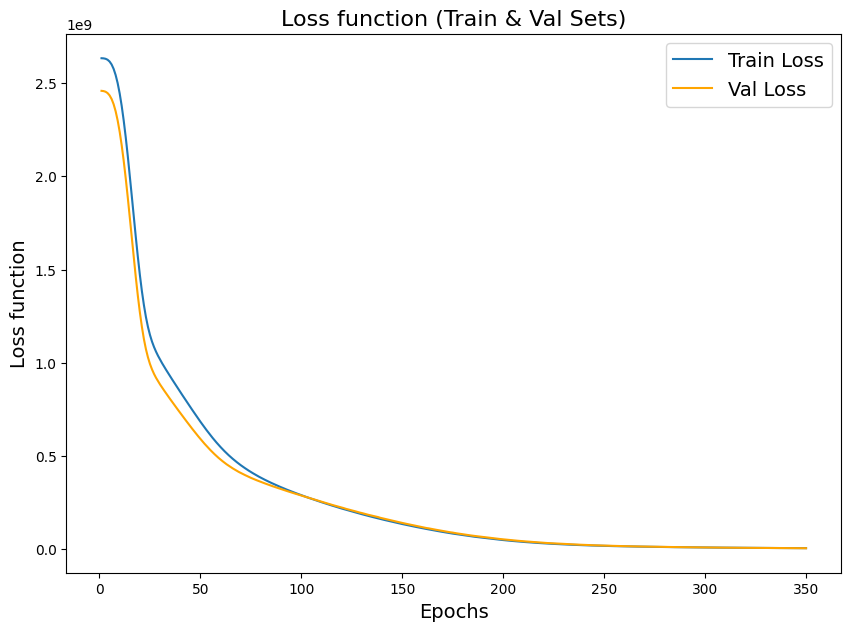

In [82]:
loss_function = regressor_history.history['loss']
val_loss_function = regressor_history.history['val_loss']
epochs = range(
    1,
    len(loss_function) + 1,
)

plt.rcParams['figure.figsize'] = [10, 7]
plt.title('Loss function (Train & Val Sets)', fontsize=16)
plt.plot(
    epochs,
    loss_function,
    label='Train Loss',
)
plt.plot(
    epochs,
    val_loss_function,
    color='orange',
    label='Val Loss',
)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss function', fontsize=14)
plt.legend(fontsize=14)
plt.show()

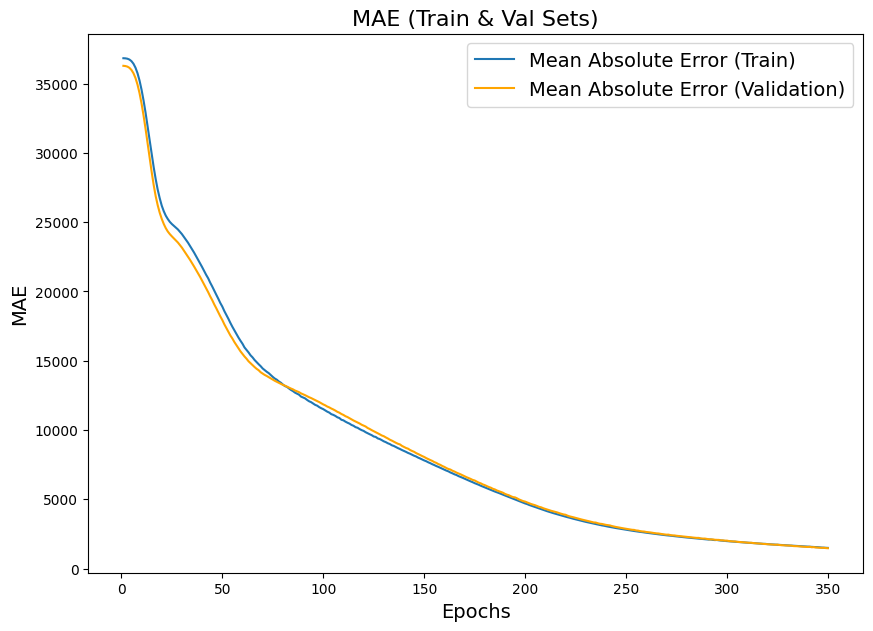

In [83]:
mae = regressor_history.history['mae']
val_mae = regressor_history.history['val_mae']
epochs = range(1, len(mae) + 1)

plt.title('MAE (Train & Val Sets)', fontsize=16)
plt.plot(
    epochs,
    mae,
    label='Mean Absolute Error (Train)',
)
plt.plot(
    epochs,
    val_mae,
    color='orange',
    label='Mean Absolute Error (Validation)',
)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.legend(fontsize=14)
plt.show()

In [84]:
regressor.load_weights('/content/checkFile.hdf5')

results = regressor.evaluate(
    X2,
    y2,
    return_dict=True,
)

y_pred = regressor.predict(X2)

print(results)

34/34 [==============================] - 0s 1ms/step
{'loss': 18637248.0, 'mae': 1644.7725830078125}


In [85]:
print(f"MSE: {mean_squared_error(y2, y_pred)}")
print(f"MAE: {mean_absolute_error(y2, y_pred)}")
print(f"R2: {r2_score(y2, y_pred)}")

MSE: 18637241.640370965
MAE: 1644.7725821587503
R2: 0.987367427541016
